In [1]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.sql.functions import *
from datetime import datetime
from pyspark.sql.functions import to_date, to_timestamp

import requests, pandas as pd, numpy as np
from pandas import DataFrame
from io import StringIO
import time, json
from datetime import date
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
confirmed_cases = spark.table("g6_confirmed_cases_csv")

In [3]:
confirmed_cases_pandas = confirmed_cases.toPandas()
confirmed_cases_pandas['Date'] = pd.to_datetime(confirmed_cases_pandas['Date'], infer_datetime_format = True)
confirmed_cases_init = confirmed_cases_pandas.set_index('Date')

In [4]:
canada_final = confirmed_cases_init[["canada_cases"]]
japan_final = confirmed_cases_init[["japan_cases"]]
italy_final = confirmed_cases_init[["italy_cases"]]
uk_final = confirmed_cases_init[["uk_cases"]]
germany_final = confirmed_cases_init[["germany_cases"]]
france_final = confirmed_cases_init[["france_cases"]]

japan_final["japan_cases"] = japan_final["japan_cases"].replace(0, 1)

italy_final["italy_cases"] = italy_final["italy_cases"].replace(0, 1)

uk_final["uk_cases"] = uk_final["uk_cases"].replace(0, 1)

france_final["france_cases"] = france_final["france_cases"].replace(0, 1)

ts_jap_log = np.log(japan_final)

ts_ita_log = np.log(italy_final)

ts_uk_log = np.log(uk_final)

ts_fra_log = np.log(france_final)

ts_jap_log['japan_cases'] = ts_jap_log['japan_cases'].diff()
ts_ita_log['italy_cases'] = ts_ita_log['italy_cases'].diff()
ts_uk_log['uk_cases'] = ts_uk_log['uk_cases'].diff()
ts_fra_log['france_cases'] = ts_fra_log['france_cases'].diff()

ts_jap_log['japan_cases'] = ts_jap_log['japan_cases'].fillna(0)
ts_ita_log['italy_cases'] = ts_ita_log['italy_cases'].fillna(0)
ts_uk_log['uk_cases'] = ts_uk_log['uk_cases'].diff().fillna(0)
ts_fra_log['france_cases'] = ts_fra_log['france_cases'].fillna(0)

can_diff = canada_final
ger_diff = germany_final

can_diff['canada_cases'] = can_diff['canada_cases'].diff()
ger_diff['germany_cases'] = ger_diff['germany_cases'].diff()

can_diff['canada_cases'] = can_diff['canada_cases'].fillna(0)
ger_diff['germany_cases'] = ger_diff['germany_cases'].fillna(0)

ger_diff['germany_cases'] = ger_diff['germany_cases'].diff()
ger_diff['germany_cases'] = ger_diff['germany_cases'].fillna(0)

can_diff.drop(can_diff.index[0], inplace=True)

ts_jap_log.drop(ts_jap_log.index[0], inplace=True)

ts_ita_log.drop(ts_ita_log.index[0], inplace=True)

ts_uk_log.drop(ts_uk_log.index[0], inplace=True)

ger_diff.drop(ger_diff.index[0], inplace=True)

ts_fra_log.drop(ts_fra_log.index[0], inplace=True)

/local_disk0/tmp/1597784351842-0/PythonShell.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 import resource
/local_disk0/tmp/1597784351842-0/PythonShell.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 import six
/local_disk0/tmp/1597784351842-0/PythonShell.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 import subprocess
/local_disk0/tmp/1597784351842-0/PythonShell.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 import time
/local_disk0/tmp/1597784351842-0/PythonShell.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 from IPython.core.magic import Magics, magics_class, line_magic
/local_disk0/tmp/1597784351842-0/PythonShell.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 try:
/local_disk0/tmp/1597784351842-0/PythonShell.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 except ImportError:
/local_disk0/tmp/1597784351842-0/PythonShell.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 try:
/local_disk0/tmp/1597784351842-0/PythonShell.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 except ImportError:
/local_disk0/tmp/1597784351842-0/PythonShell.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 from databricks_nbconvert_5_31_ansi2html import ansi2html
/databricks/python/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 errors=errors)

In [5]:
def train(input, order, country):
  model = ARIMA(input.astype(float), order=order) 
  results_ARIMA = model.fit(maxiter=500)  
  print(results_ARIMA.summary())

  fitted_values  = results_ARIMA.predict(1,len(input)-1,typ='linear')
  fitted_values_frame = fitted_values.to_frame()

  x = input.merge(fitted_values_frame, how='outer', left_index=True, right_index=True)

  fig= x.plot(y = [country, 0], figsize=(20,5))
  display(fig.figure)

In [6]:
def pred(train, order, start, end, test):
  model_test = ARIMA(train.astype(float), order=order) 
  results_test_ARIMA = model_test.fit(maxiter=500) 

  fitted_values_test  = results_test_ARIMA.predict(start, end,typ='linear') 
  fitted_values_test_frame = fitted_values_test.to_frame()

  fig, ax = plt.subplots(figsize=(20,5))
  ax.set(title='Predictions', xlabel='Date', ylabel='Total Number of Cases')
  ax.plot(train, 'blue', label='training data') 
  ax.plot(test, 'black', label='test data actuals')
  ax.plot(fitted_values_test_frame, 'r', label='test data forecast')  # np.exp(predictions_series)
  legend = ax.legend(loc='upper left')
  legend.get_frame().set_facecolor('w')
  display(fig.figure)
  
  return np.sqrt(metrics.mean_squared_error(can_diff.iloc[start - 1:end], fitted_values_test_frame))

In [7]:
from sklearn import metrics

def smape(true, pred):
  print(np.sqrt(metrics.mean_squared_error(true, pred)))

# 30 days (Canada)

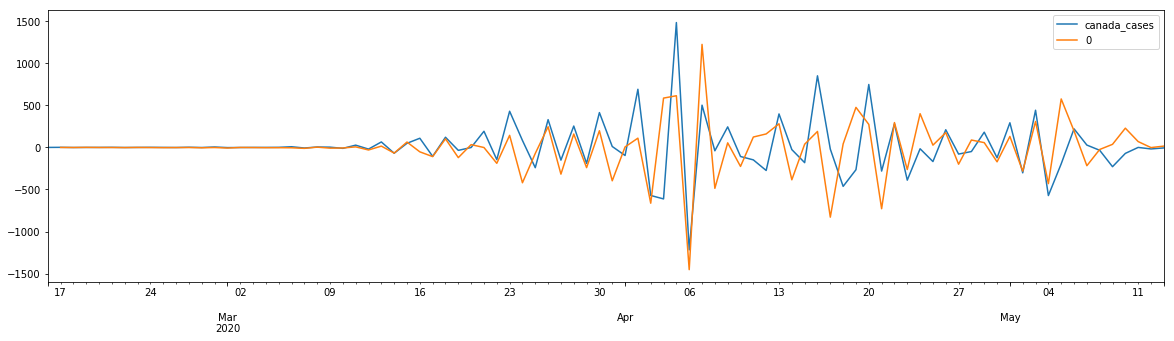

In [9]:
train(can_diff.iloc[:88], (0, 1, 1), "canada_cases")

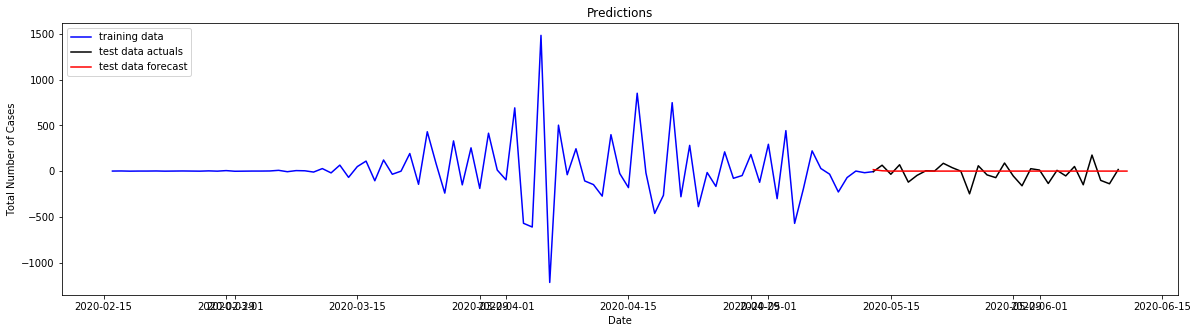

In [10]:
can_30 = pred(can_diff.iloc[:88], (0, 1, 1), 87, 116, can_diff.iloc[87:116])

In [11]:
can_30

Out[391]: 91.84121040574516

# 14 days (Canada)

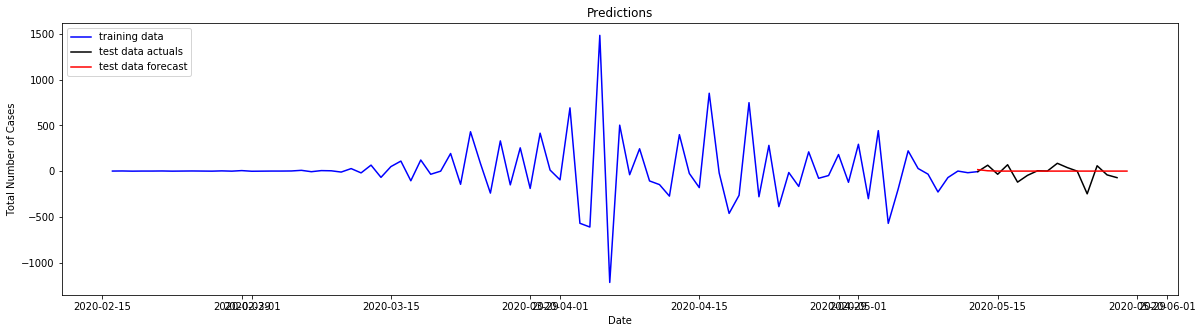

In [13]:
can_14_1 = pred(can_diff.iloc[:88], (0, 1, 1), 87, 102, can_diff.iloc[87:102])

In [14]:
can_14_1

Out[211]: 82.52149543536471

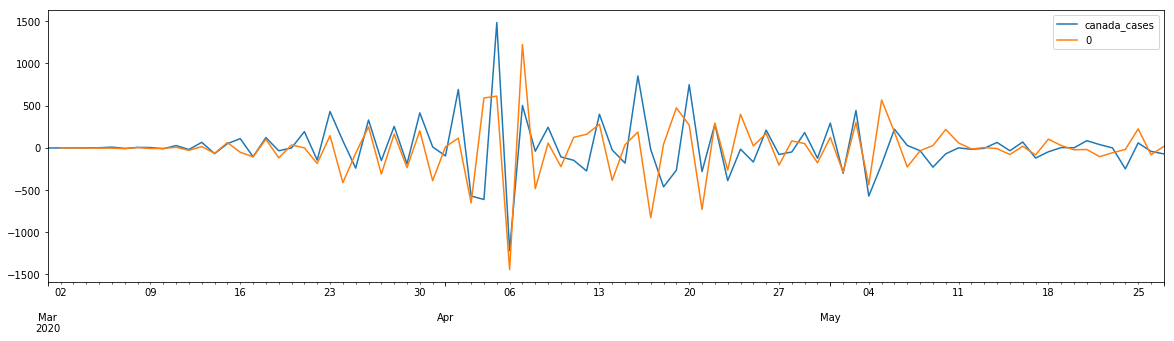

In [15]:
train(can_diff.iloc[14:102], (0, 1, 1), "canada_cases")

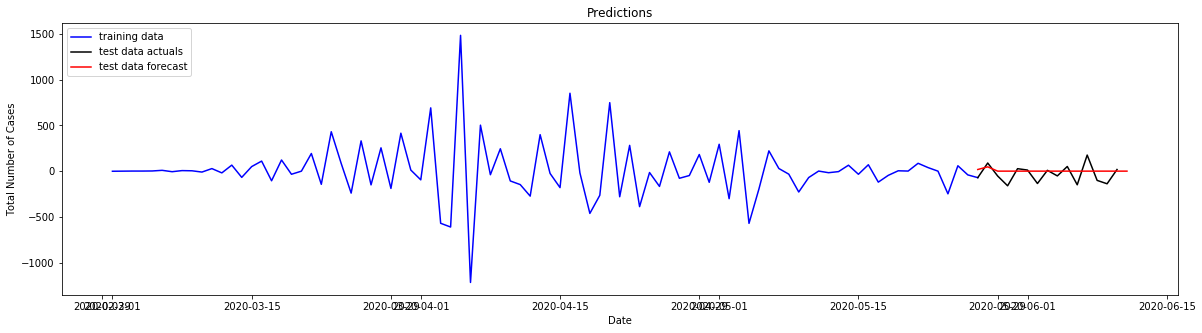

In [16]:
can_14_2 = pred(can_diff.iloc[14:102], (0, 1, 1), 87, 102, can_diff.iloc[101:116])

In [17]:
can_14_2

Out[121]: 83.46844199972914

# 7 days (Canada)

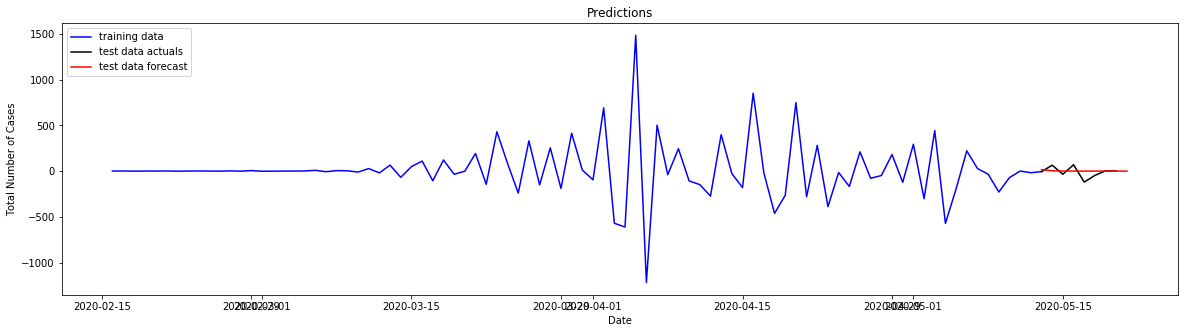

In [19]:
can_7_1 = pred(can_diff.iloc[:88], (0, 1, 1), 87, 95, can_diff.iloc[87:95])

In [20]:
can_7_1

Out[210]: 55.88053590895589

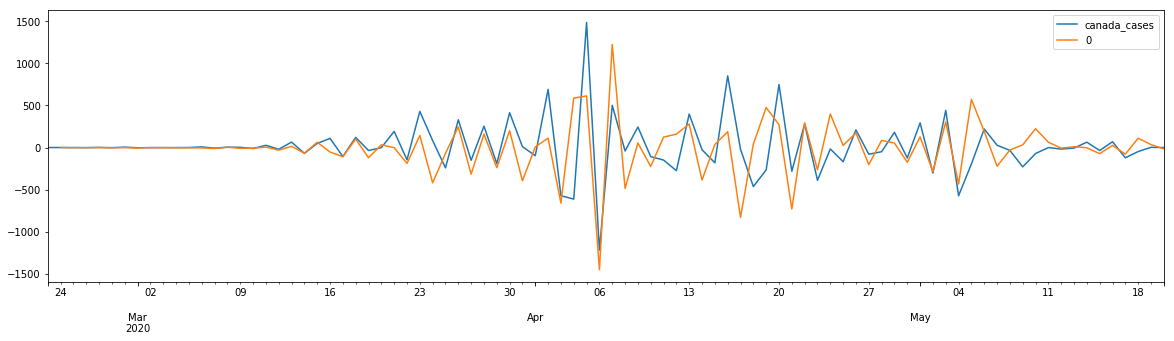

In [21]:
train(can_diff.iloc[7:95], (0, 1, 1), "canada_cases")

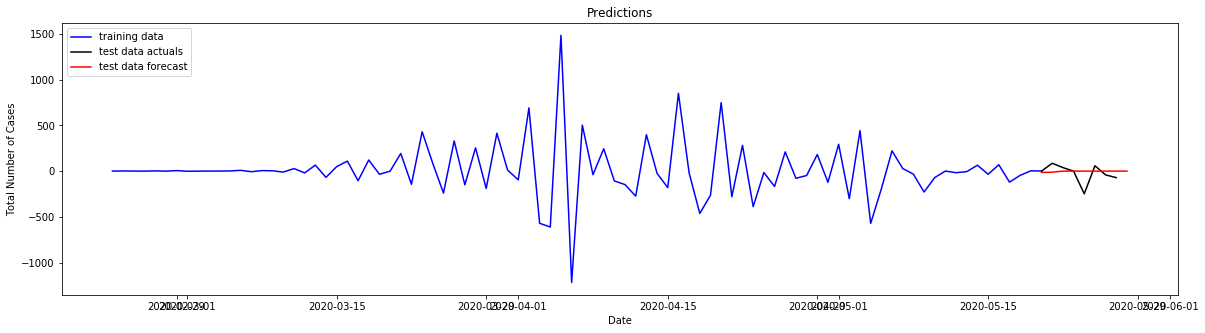

In [22]:
can_7_2 = pred(can_diff.iloc[7:95], (0, 1, 1), 87, 95, can_diff.iloc[94:102])

In [23]:
can_7_2

Out[126]: 54.69095939464316

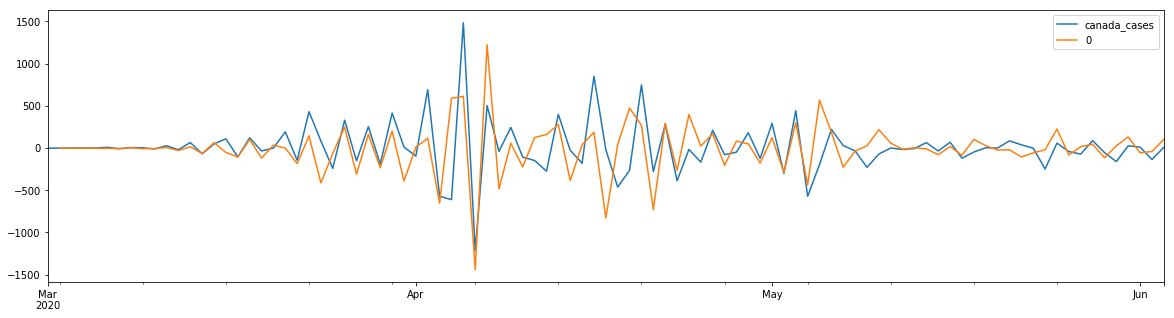

In [24]:
train(can_diff.iloc[14:109], (0, 1, 1), "canada_cases")

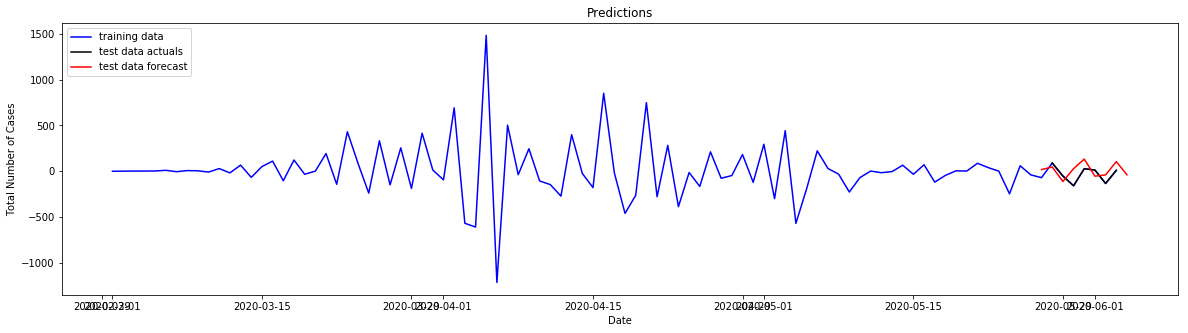

In [25]:
can_7_3 = pred(can_diff.iloc[14:109], (0, 1, 1), 87, 95, can_diff.iloc[102:109])

In [26]:
can_7_3

Out[130]: 81.18480064590575

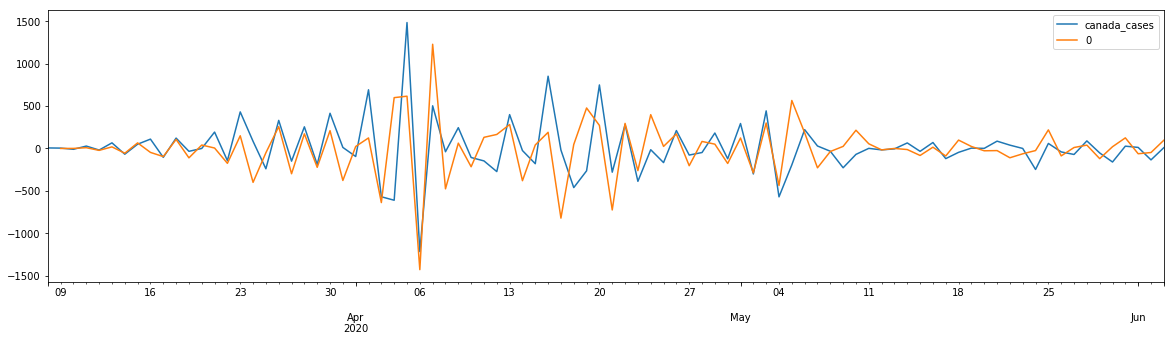

In [27]:
train(can_diff.iloc[21:109], (0, 1, 1), "canada_cases")

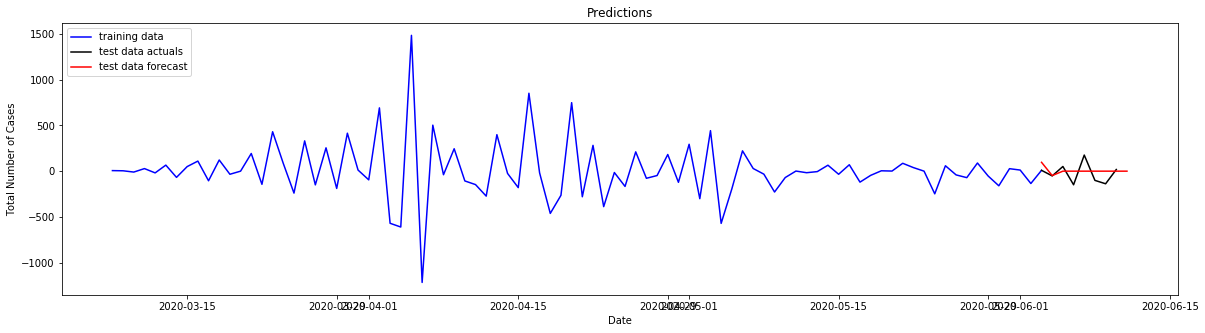

In [28]:
can_7_4 = pred(can_diff.iloc[21:109], (0, 1, 1), 87, 95, can_diff.iloc[108:116])

In [29]:
can_7_4

Out[213]: 67.99631897238943

# 1 day (Canada)

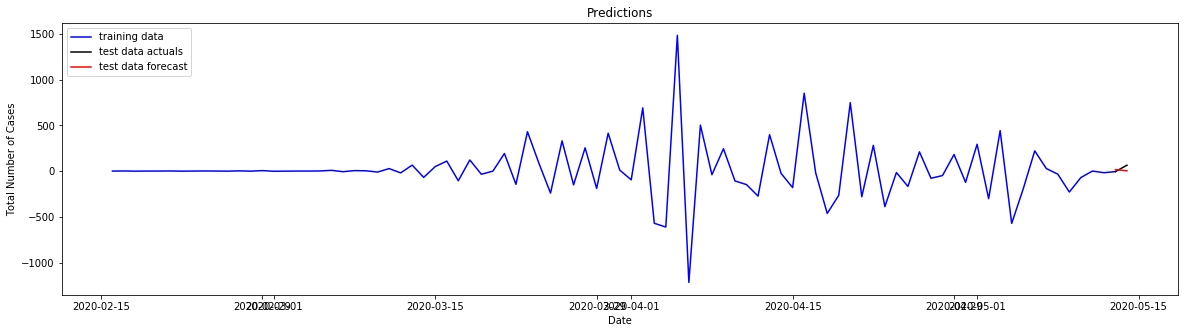

In [31]:
can_1_1 = pred(can_diff.iloc[0:88], (0, 1, 1), 87, 88, can_diff.iloc[87:89])

In [32]:
can_1_1

Out[216]: 24.593902181702198

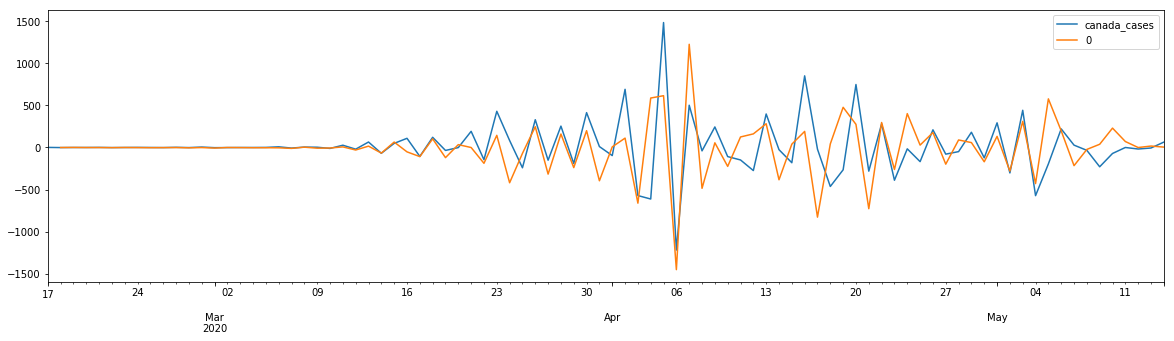

In [33]:
train(can_diff.iloc[1:89], (0, 1, 1), "canada_cases")

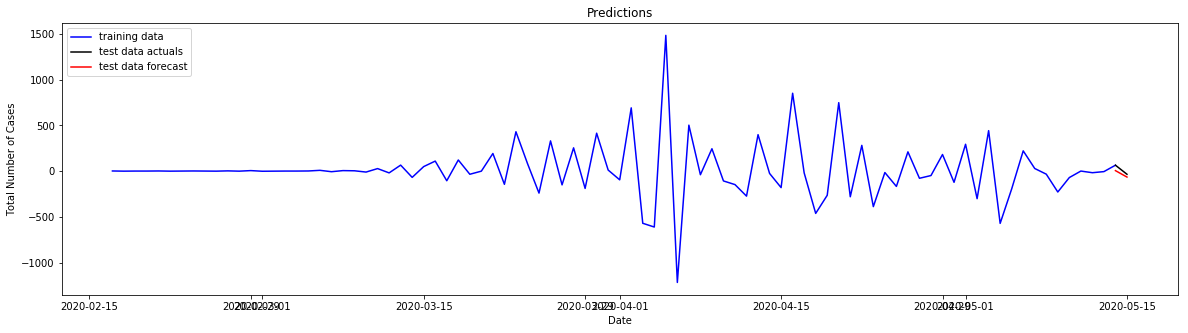

In [34]:
can_1_2 = pred(can_diff.iloc[1:89], (0, 1, 1), 87, 88, can_diff.iloc[88:90])

In [35]:
can_1_2

Out[221]: 45.09786780164955

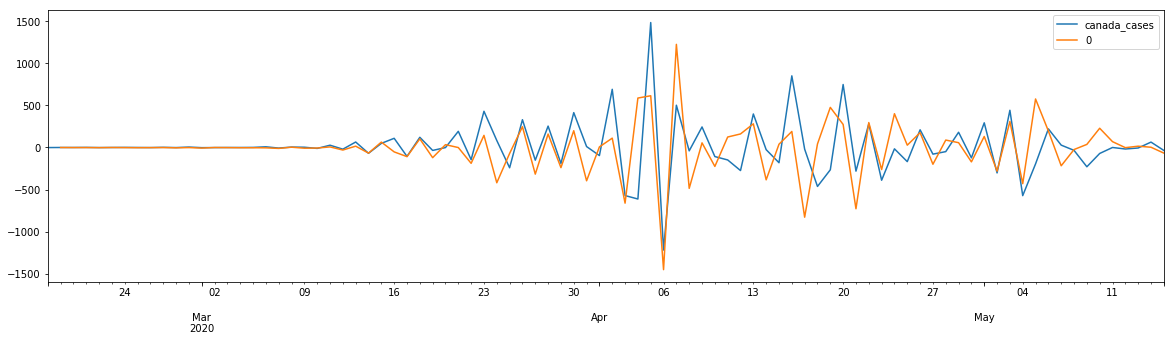

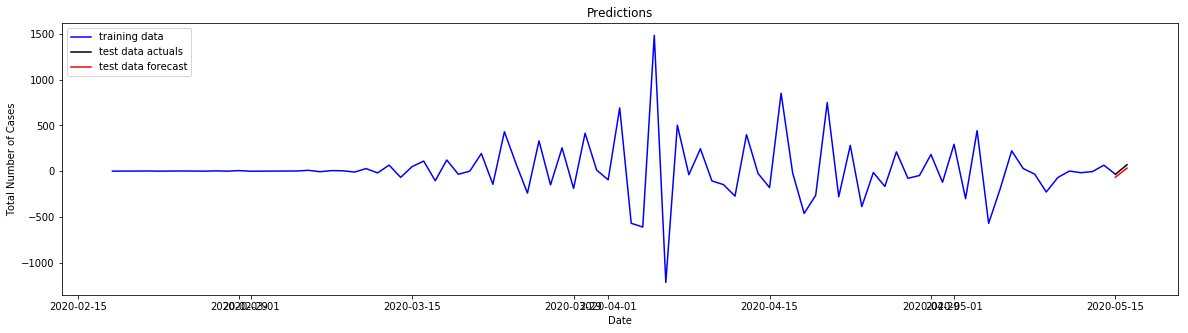

In [36]:
train(can_diff.iloc[2:90], (0, 1, 1), "canada_cases")

can_1_3 = pred(can_diff.iloc[2:90], (0, 1, 1), 87, 88, can_diff.iloc[89:91])

In [37]:
can_1_3

Out[222]: 43.63566974834617

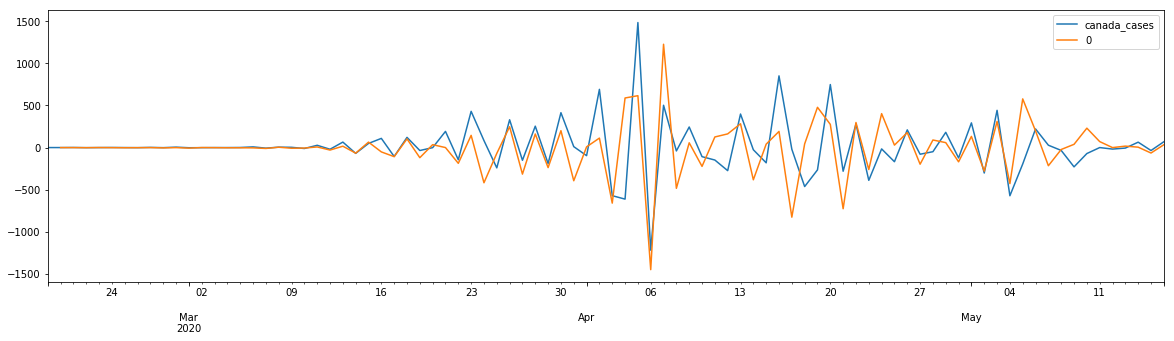

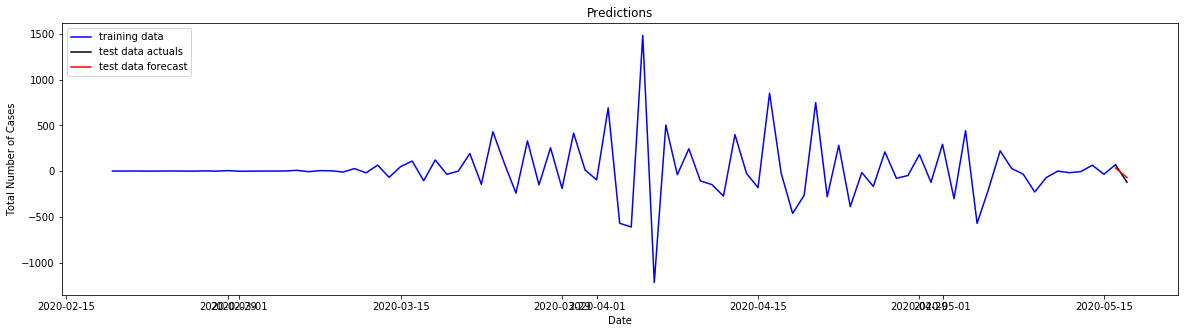

In [38]:
train(can_diff.iloc[3:91], (0, 1, 1), "canada_cases")

can_1_4 = pred(can_diff.iloc[3:91], (0, 1, 1), 87, 88, can_diff.iloc[90:92])

In [39]:
can_1_4

Out[224]: 58.568566665503006

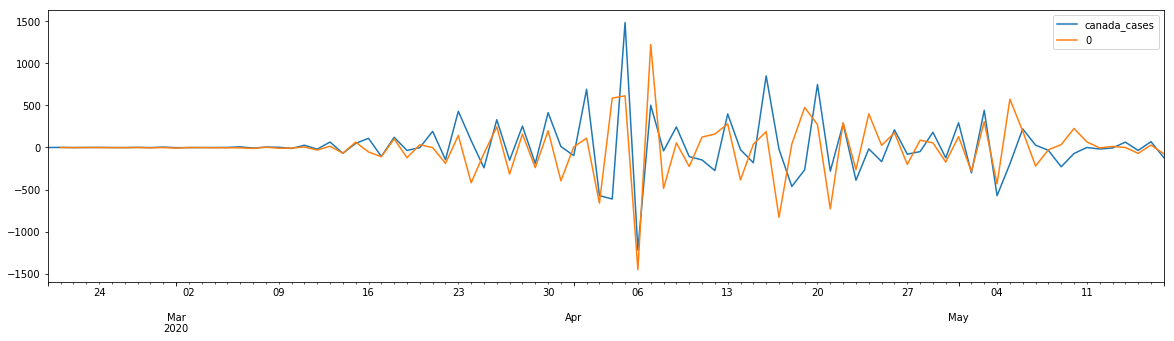

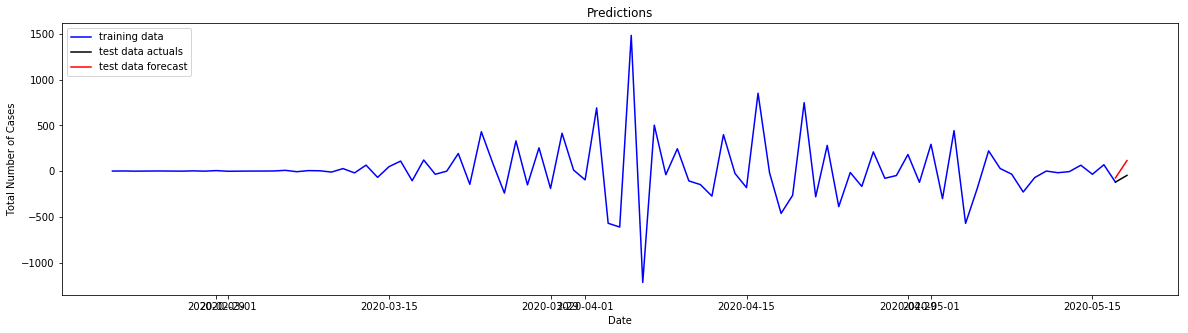

In [40]:
train(can_diff.iloc[4:92], (0, 1, 1), "canada_cases")

can_1_5 = pred(can_diff.iloc[4:92], (0, 1, 1), 87, 88, can_diff.iloc[91:93])

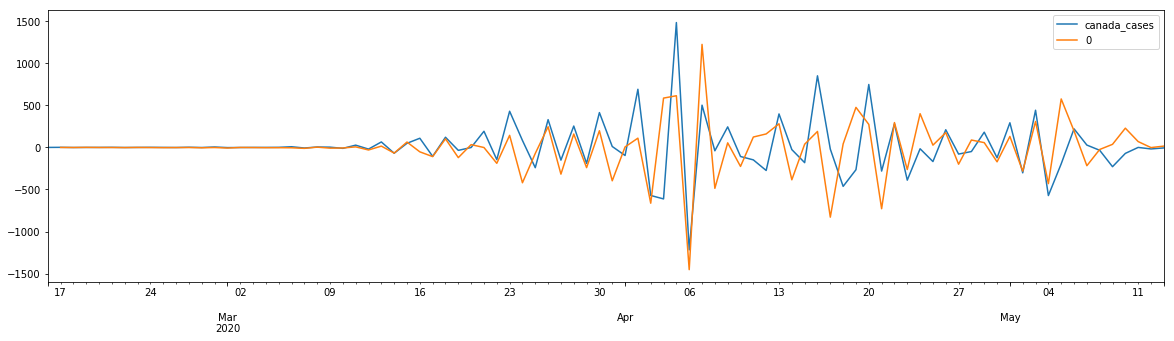

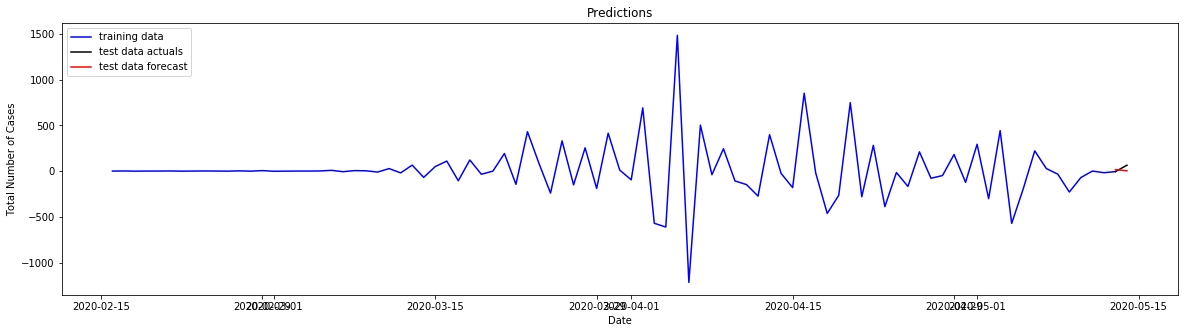

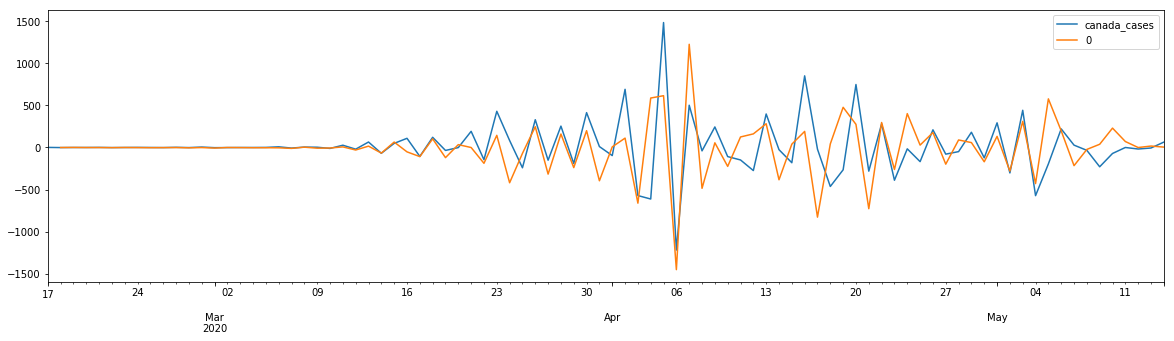

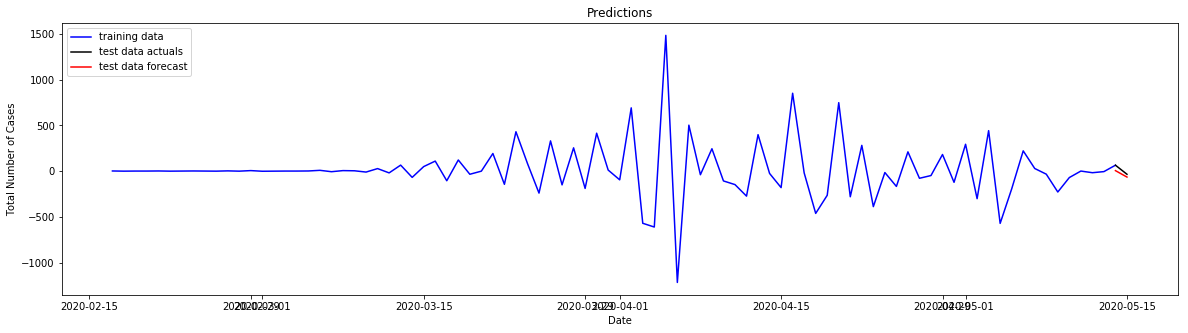

In [41]:
i = 0
j = 87
k = []
for l in range (88, 116):
  first = train(can_diff.iloc[i:l], (0, 1, 1), "canada_cases")
  second = pred(can_diff.iloc[i:l], (0, 1, 1), 87, 88, can_diff.iloc[j:l+1])
  k = k.append(second)
  i += 1
  j += 1

In [42]:
k


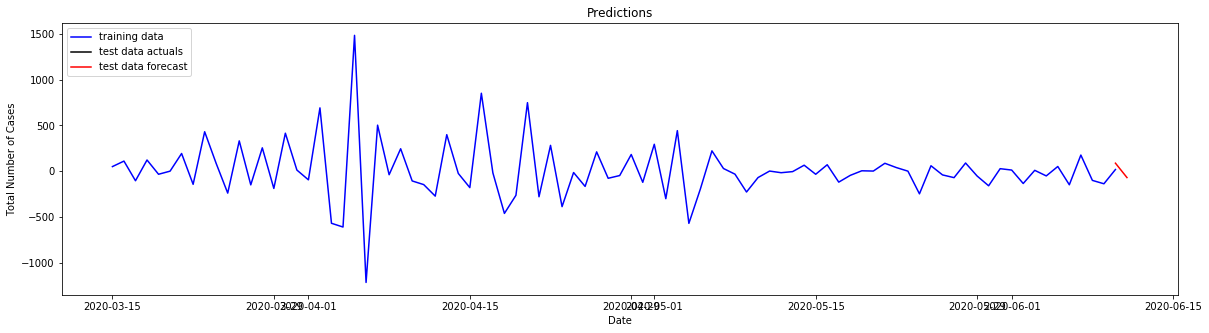

In [43]:
#can_1_1 = pred(can_diff.iloc[0:88], (0, 1, 1), 87, 88, can_diff.iloc[87:88])

#can_1_30 = pred(can_diff.iloc[28:116], (0, 1, 1), 87, 88, can_diff.iloc[115:116])

# 30 days (Japan)

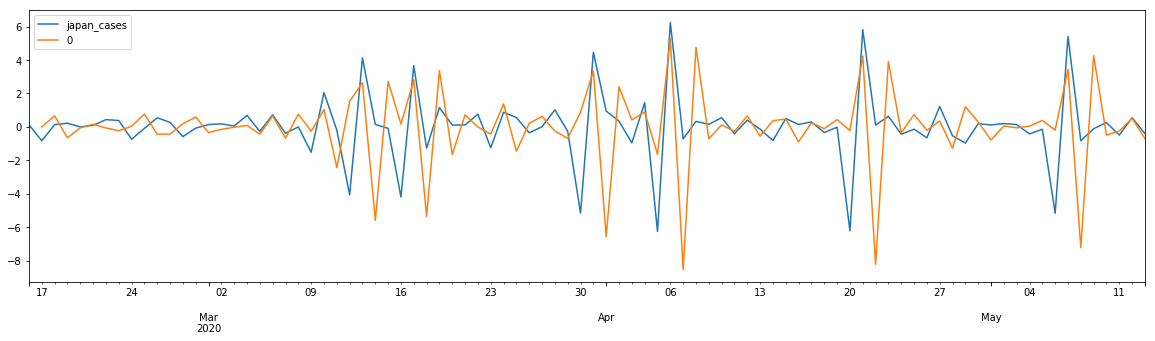

In [45]:
train(ts_jap_log.iloc[:88], (1, 1, 0), "japan_cases")

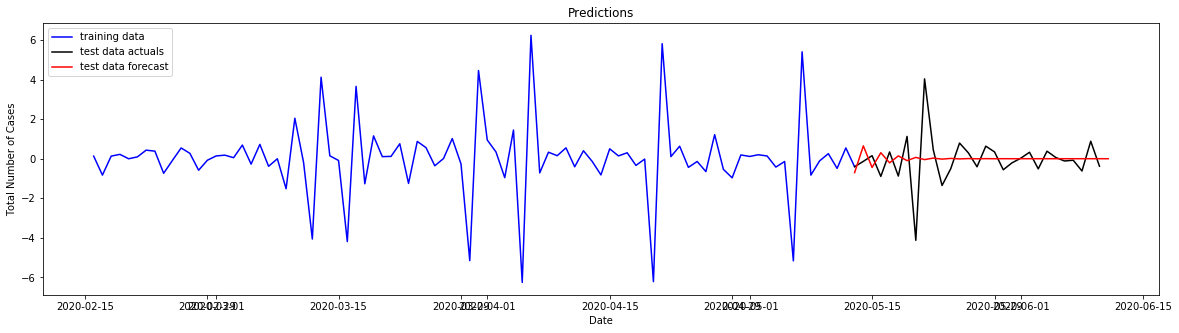

In [46]:
jap_30 = pred(ts_jap_log.iloc[:88], (1, 1, 0), 87, 116, ts_jap_log.iloc[87:116])

In [47]:
jap_30

Out[183]: 91.79329063404275

# 14 days (Japan)

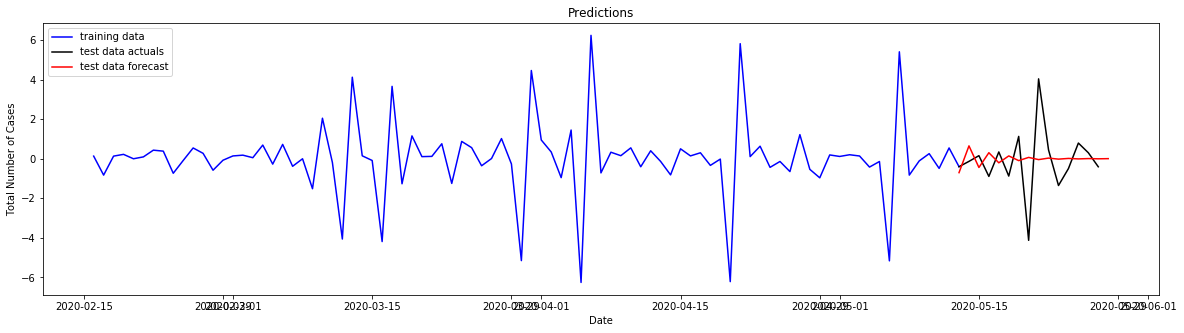

In [49]:
jap_14_1 = pred(ts_jap_log.iloc[:88], (1, 1, 0), 87, 102, ts_jap_log.iloc[87:102])

In [50]:
jap_14_1

Out[189]: 82.30718480522303

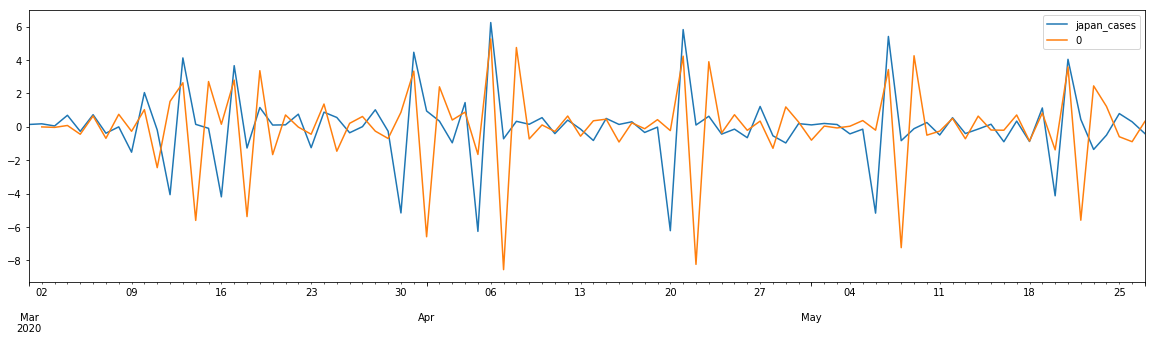

In [51]:
train(ts_jap_log.iloc[14:102], (1, 1, 0), "japan_cases")

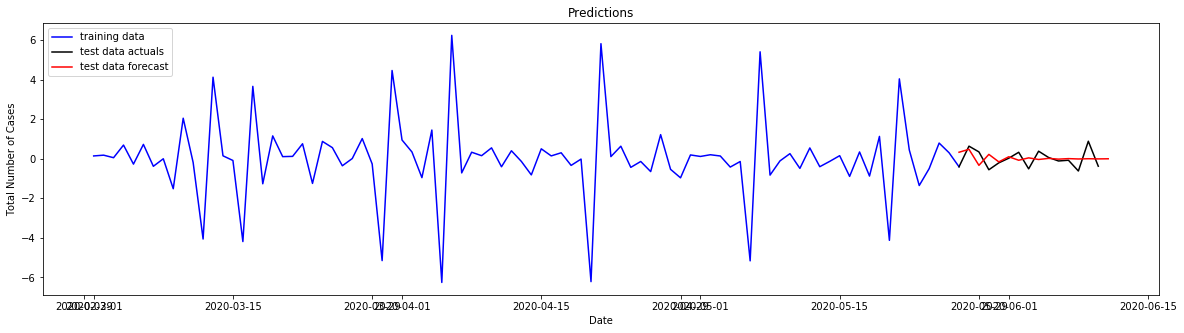

In [52]:
jap_14_2 = pred(ts_jap_log.iloc[14:102], (1, 1, 0), 87, 102, ts_jap_log.iloc[101:116])

In [53]:
jap_14_2

Out[239]: 82.3070930869444

# 7 days (Japan)

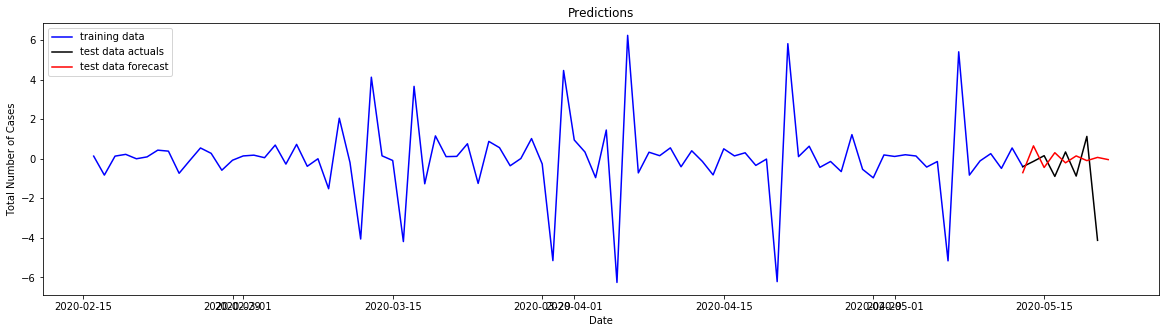

In [55]:
jap_7_1 = pred(ts_jap_log.iloc[:88], (1, 1, 0), 87, 95, ts_jap_log.iloc[87:95])

In [56]:
jap_7_1

Out[241]: 55.19339907492203

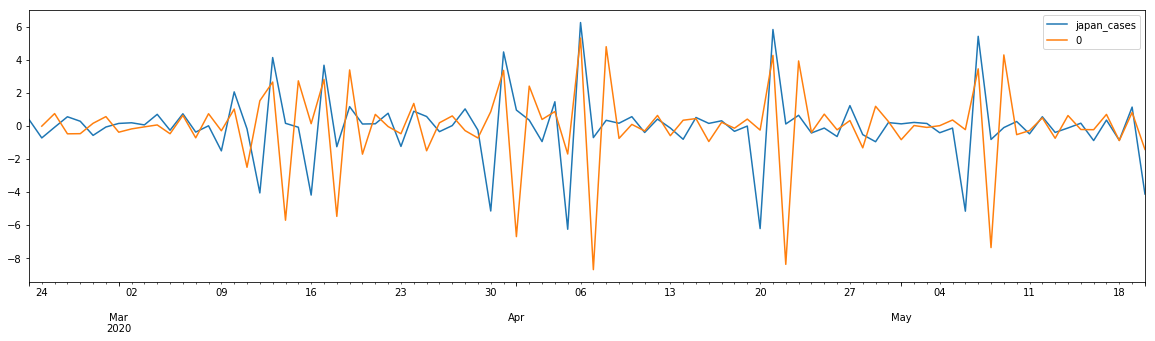

In [57]:
train(ts_jap_log.iloc[7:95], (1, 1, 0), "japan_cases")

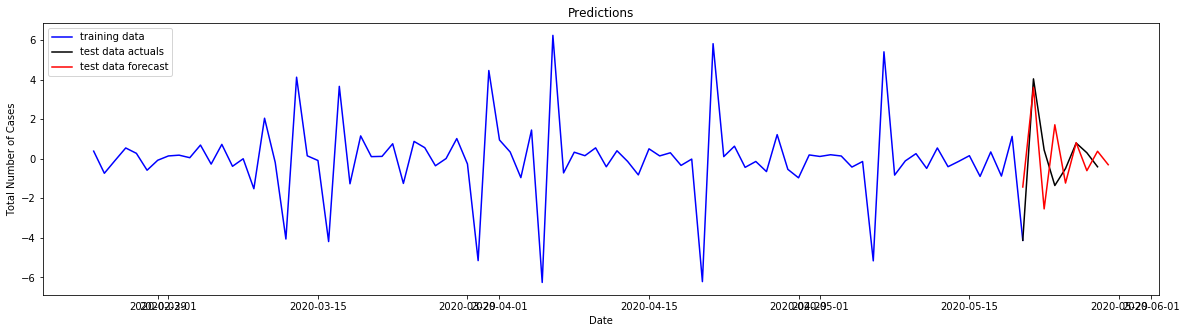

In [58]:
jap_7_2 = pred(ts_jap_log.iloc[7:95], (1, 1, 0), 87, 95, ts_jap_log.iloc[94:102])

In [59]:
jap_7_2

Out[244]: 55.85014863099527

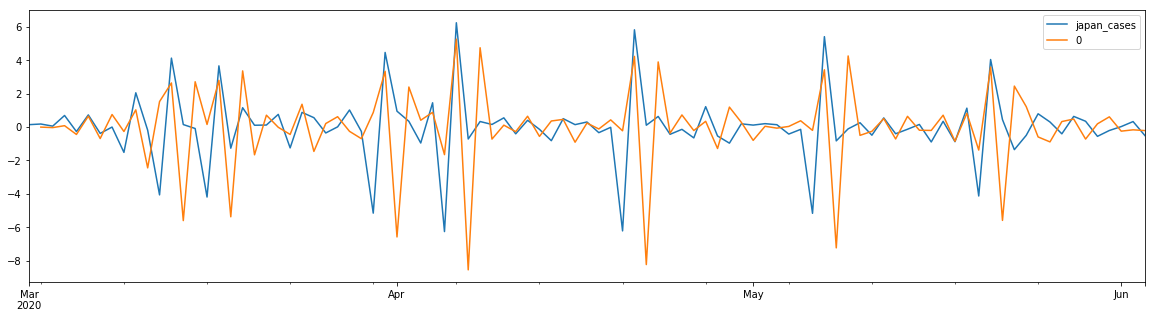

In [60]:
train(ts_jap_log.iloc[14:109], (1, 1, 0), "japan_cases")

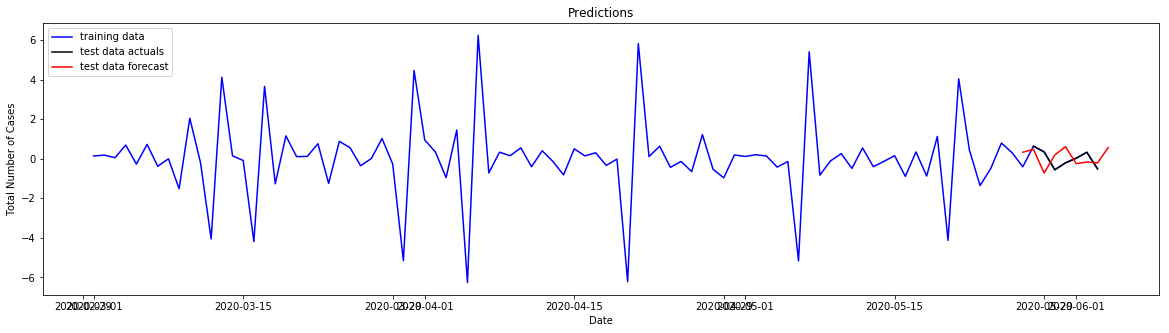

In [61]:
jap_7_3 = pred(ts_jap_log.iloc[14:109], (1, 1, 0), 87, 95, ts_jap_log.iloc[102:109])

In [62]:
jap_7_3

Out[247]: 55.043195833959025

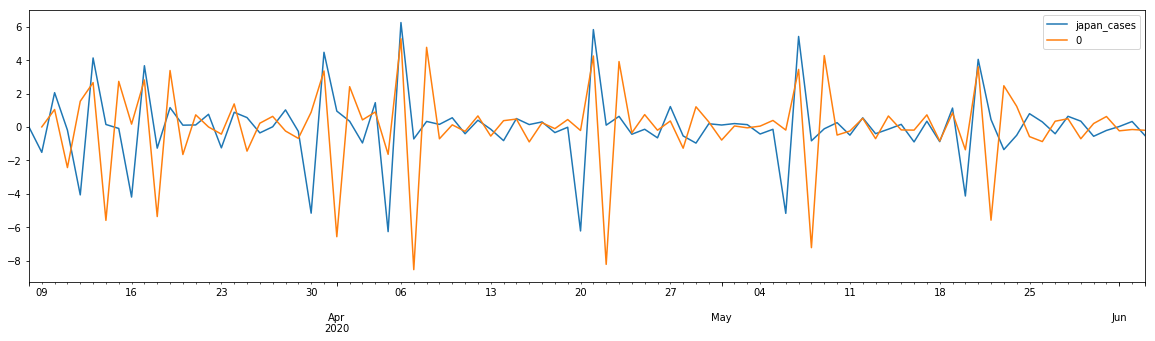

In [63]:
train(ts_jap_log.iloc[21:109], (1, 1, 0), "japan_cases")

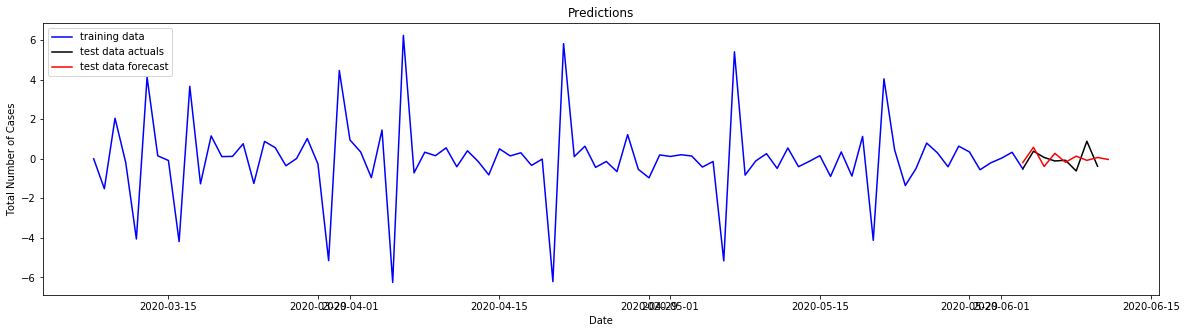

In [64]:
jap_7_4 = pred(ts_jap_log.iloc[21:109], (1, 1, 0), 87, 95, ts_jap_log.iloc[108:116])

In [65]:
jap_7_4

Out[250]: 55.19548829609724

# 1 day (Japan)

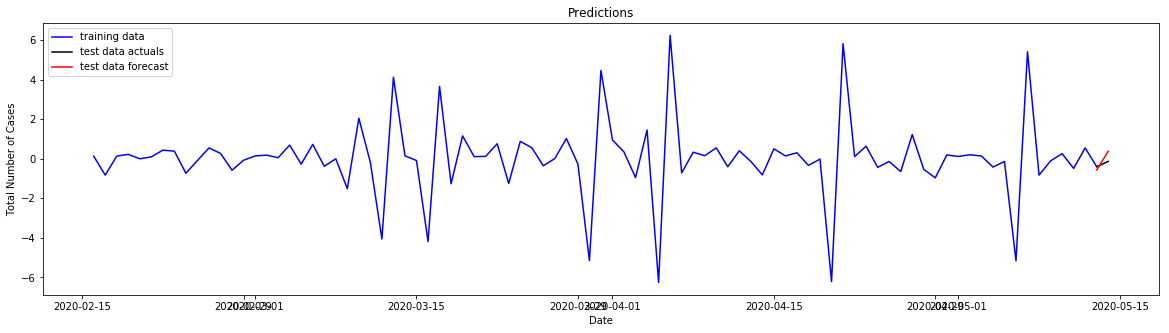

In [67]:
jap_1_1 = pred(ts_jap_log.iloc[0:88], (0, 1, 1), 87, 88, ts_jap_log.iloc[87:89])

In [68]:
jap_1_1

Out[252]: 13.124390965438216

# 30 days (Italy)

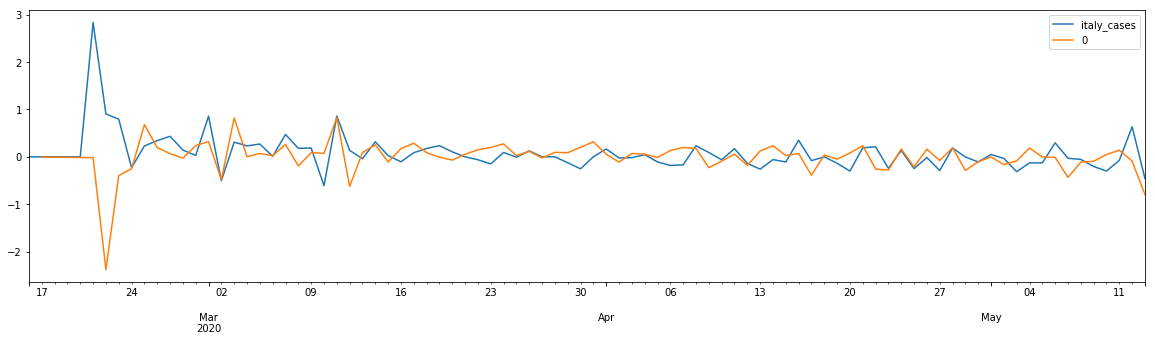

In [70]:
train(ts_ita_log.iloc[:88], (0, 1, 1), "italy_cases")

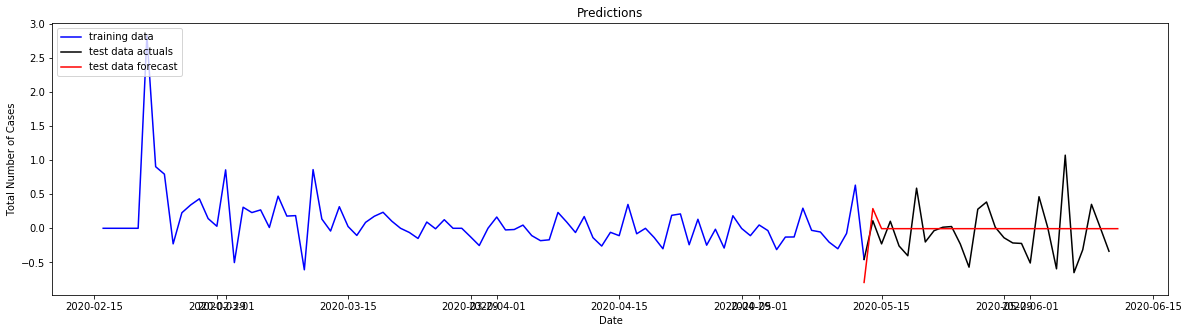

In [71]:
ita_30 = pred(ts_ita_log.iloc[:88], (0, 1, 1), 87, 116, ts_ita_log.iloc[87:116])

In [72]:
ita_30

Out[258]: 91.76747832696711

# 14 days (Italy)

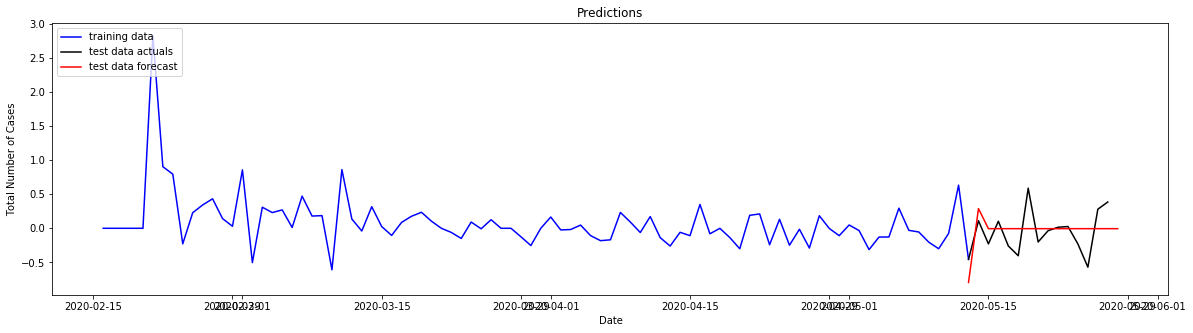

In [74]:
ita_14_1 = pred(ts_ita_log.iloc[:88], (0, 1, 1), 87, 102, ts_ita_log.iloc[87:102])

In [75]:
ita_14_1

Out[266]: 82.25599437163298

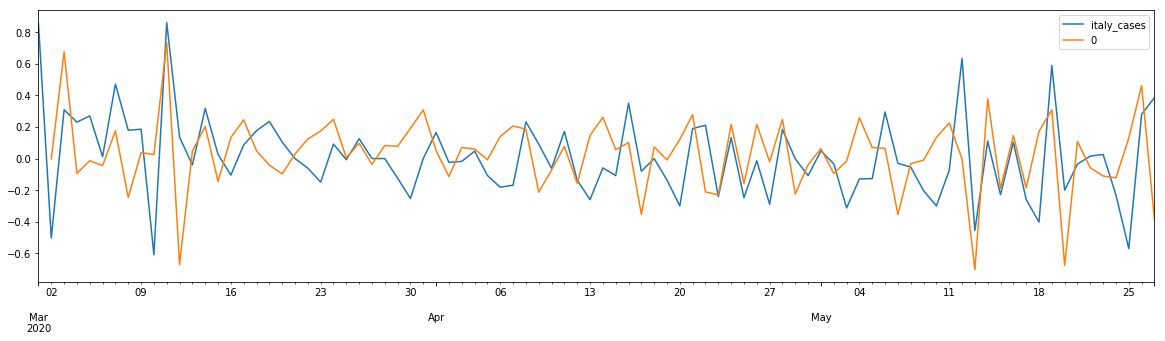

In [76]:
train(ts_ita_log.iloc[14:102], (0, 1, 1), "italy_cases")

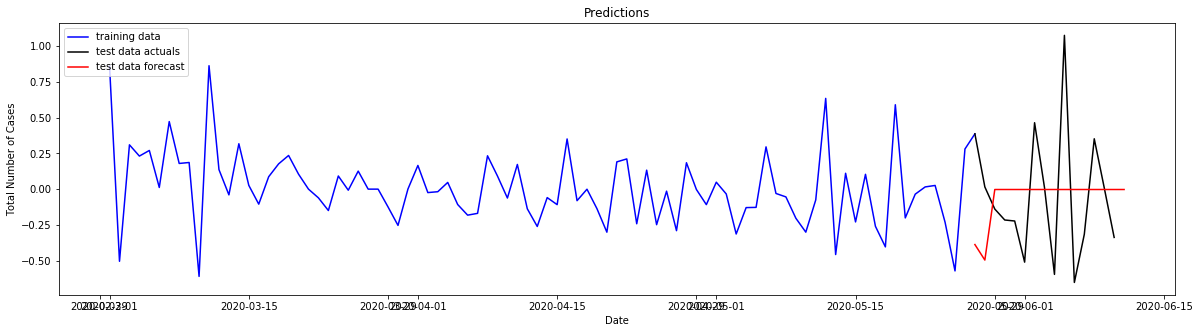

In [77]:
ita_14_2 = pred(ts_ita_log.iloc[14:102], (0, 1, 1), 87, 102, ts_ita_log.iloc[101:116])

In [78]:
ita_14_2

Out[269]: 82.2584513412958

# 7 days (Italy)

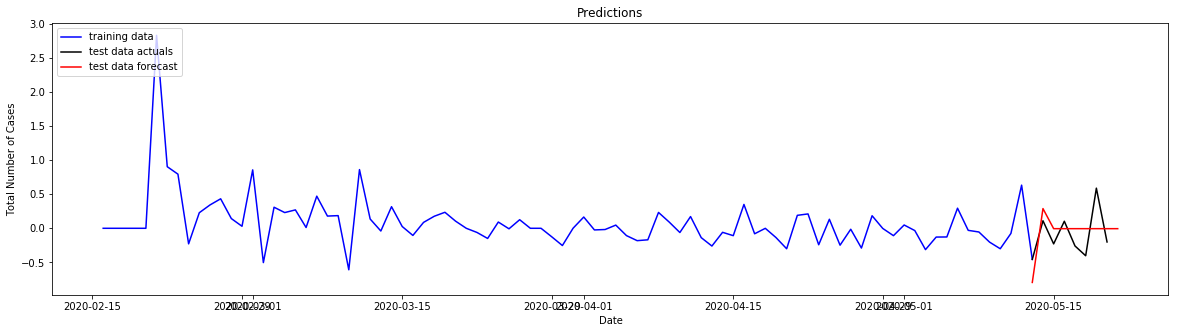

In [80]:
ita_7_1 = pred(ts_ita_log.iloc[:88], (0, 1, 1), 87, 95, ts_ita_log.iloc[87:95])

In [81]:
ita_7_1

Out[271]: 55.051304227670144

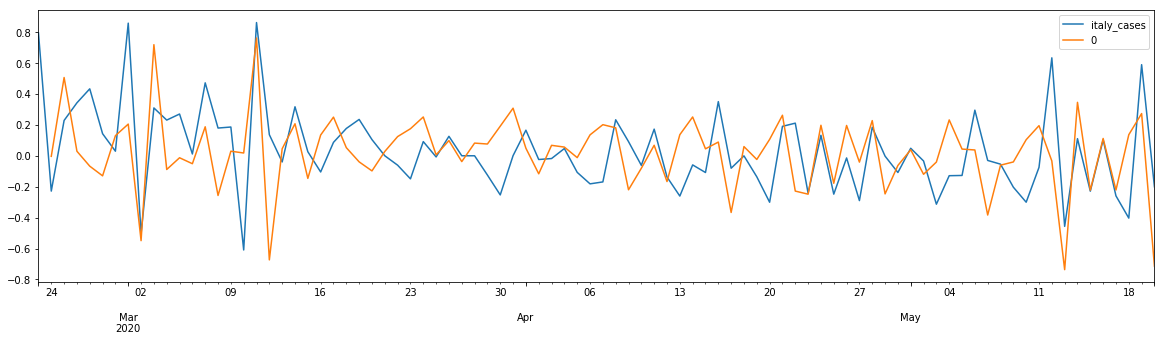

In [82]:
train(ts_ita_log.iloc[7:95], (0, 1, 1), "italy_cases")

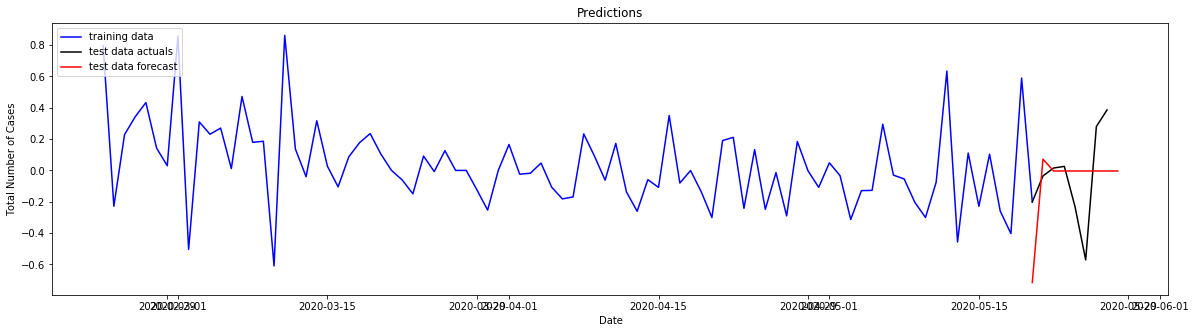

In [83]:
ita_7_2 = pred(ts_ita_log.iloc[7:95], (0, 1, 1), 87, 95, ts_ita_log.iloc[94:102])

In [84]:
ita_7_2

Out[274]: 55.0516512120379

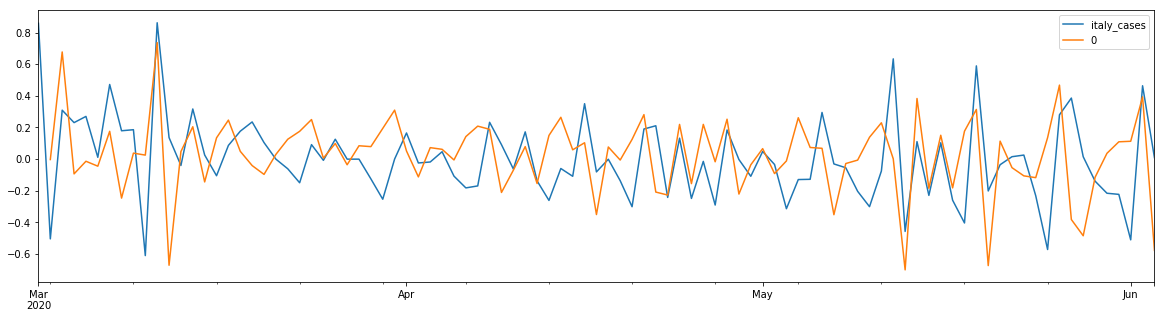

In [85]:
train(ts_ita_log.iloc[14:109], (0, 1, 1), "italy_cases")

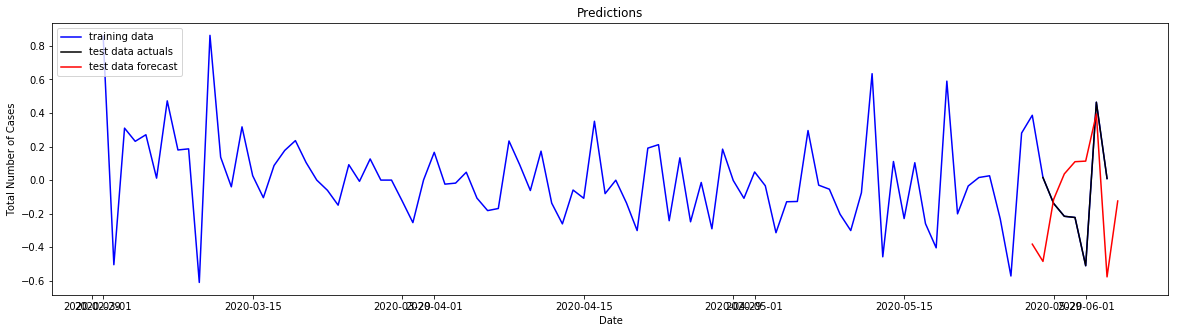

In [86]:
ita_7_3 = pred(ts_ita_log.iloc[14:109], (0, 1, 1), 87, 95, ts_ita_log.iloc[102:109])

In [87]:
ita_7_3

Out[277]: 55.128444324183306

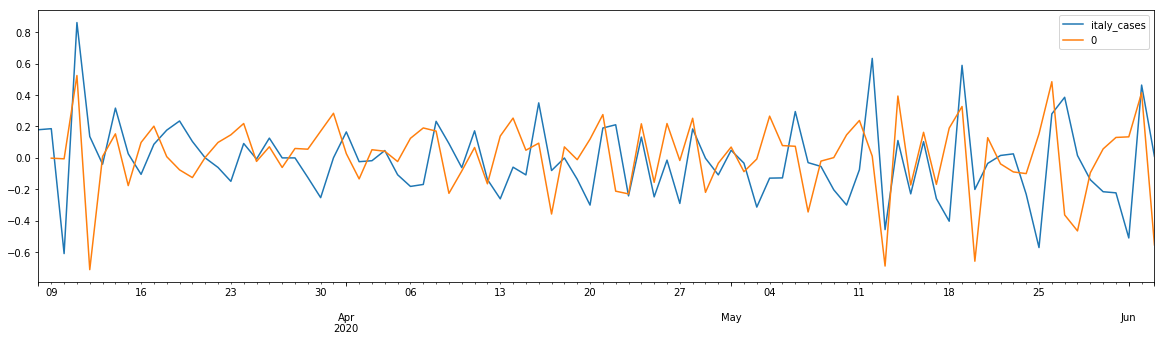

In [88]:
train(ts_ita_log.iloc[21:109], (0, 1, 1), "italy_cases")

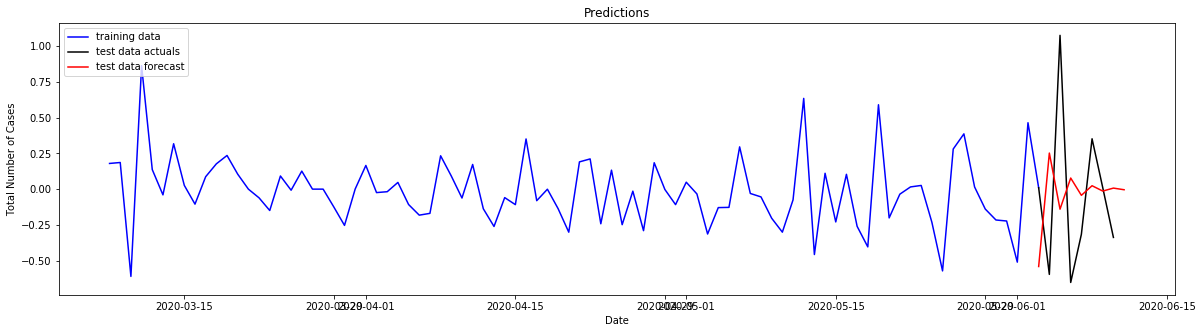

In [89]:
ita_7_4 = pred(ts_ita_log.iloc[21:109], (1, 1, 0), 87, 95, ts_ita_log.iloc[108:116])

In [90]:
ita_7_4

Out[280]: 55.09457161589674

# 1 day (Italy)

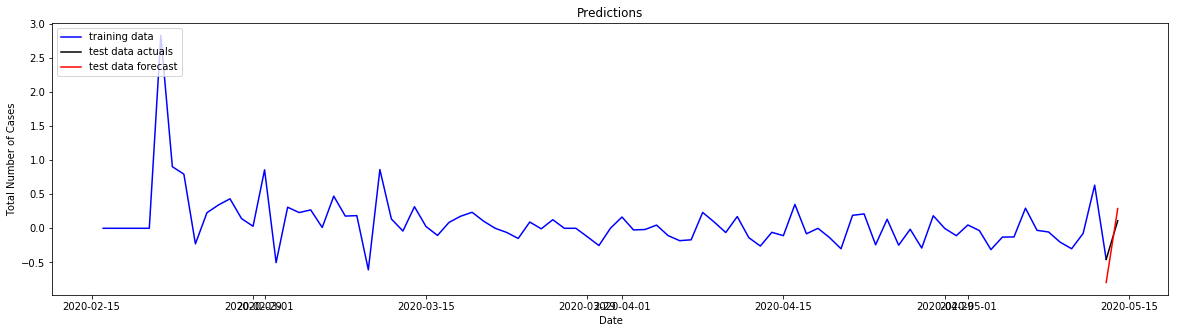

In [92]:
ita_1_1 = pred(ts_ita_log.iloc[0:88], (0, 1, 1), 87, 88, ts_ita_log.iloc[87:89])

In [93]:
ita_1_1

Out[282]: 12.95300284568388

# 30 days (UK)

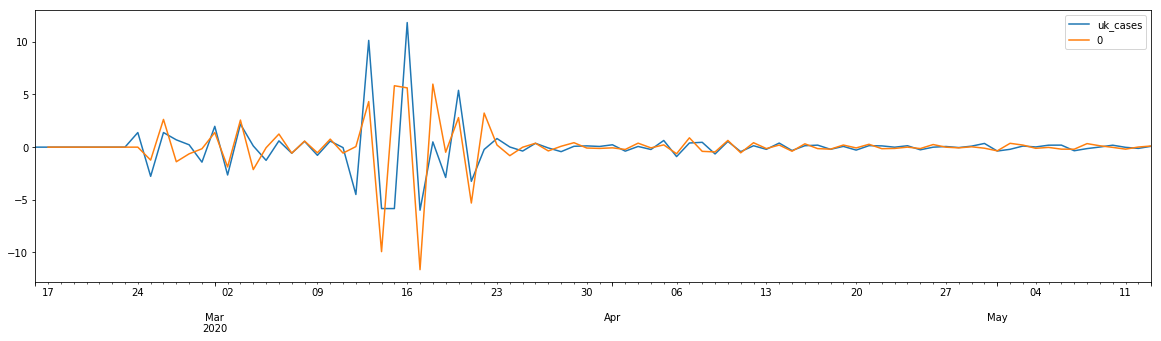

In [95]:
train(ts_uk_log.iloc[:88], (0, 1, 1), "uk_cases")

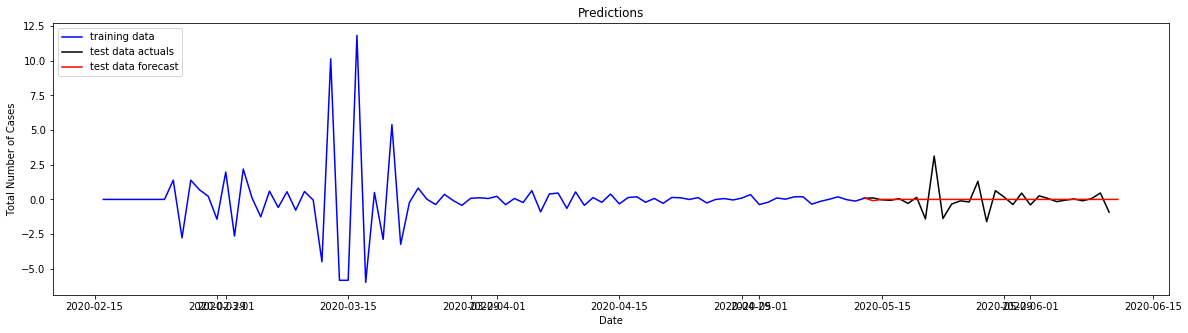

In [96]:
uk_30 = pred(ts_uk_log.iloc[:88], (0, 1, 1), 87, 116, ts_uk_log.iloc[87:116])

In [97]:
uk_30

Out[285]: 91.77374538949802

# 14 days (UK)

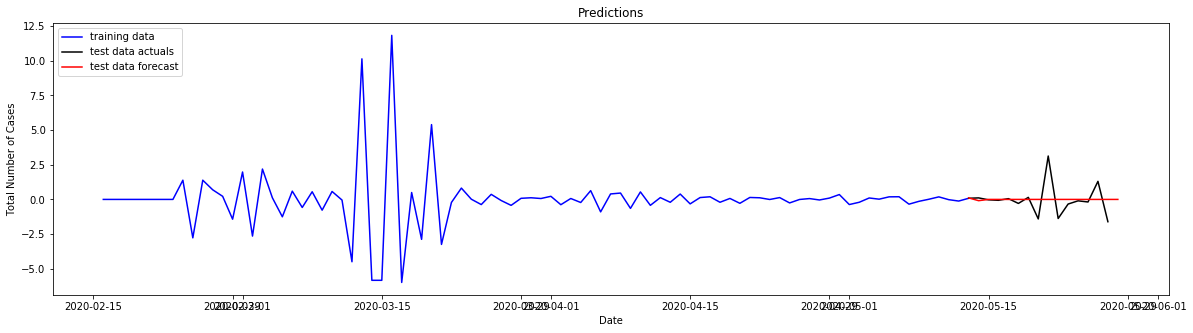

In [99]:
uk_14_1 = pred(ts_uk_log.iloc[:88], (0, 1, 1), 87, 102, ts_uk_log.iloc[87:102])

In [100]:
uk_14_1

Out[287]: 82.26738485866198

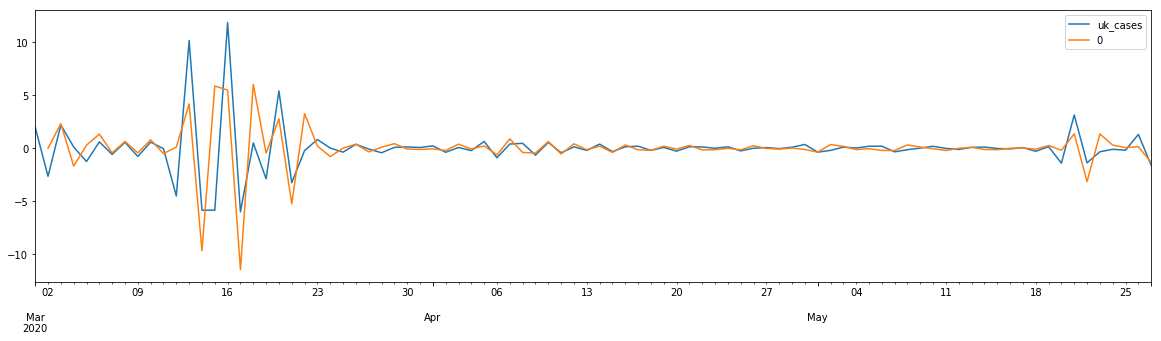

In [101]:
train(ts_uk_log.iloc[14:102], (0, 1, 1), "uk_cases")

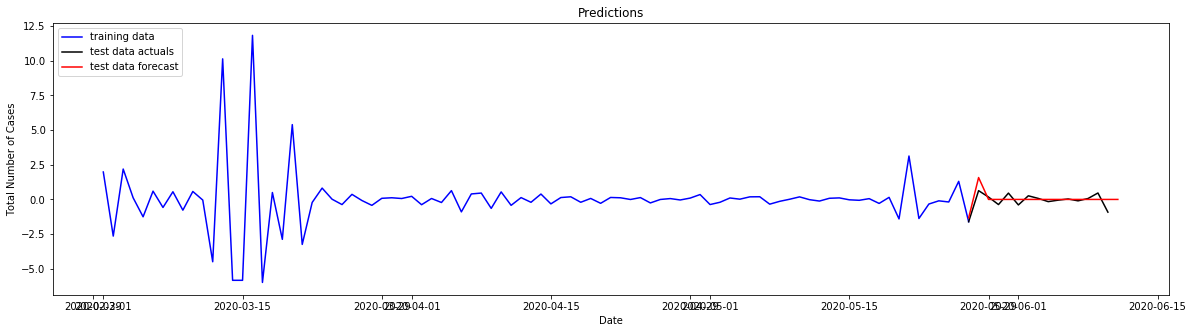

In [102]:
uk_14_2 = pred(ts_uk_log.iloc[14:102], (0, 1, 1), 87, 102, ts_uk_log.iloc[101:116])

In [103]:
uk_14_2

Out[290]: 82.25671482206283

# 7 days (UK)

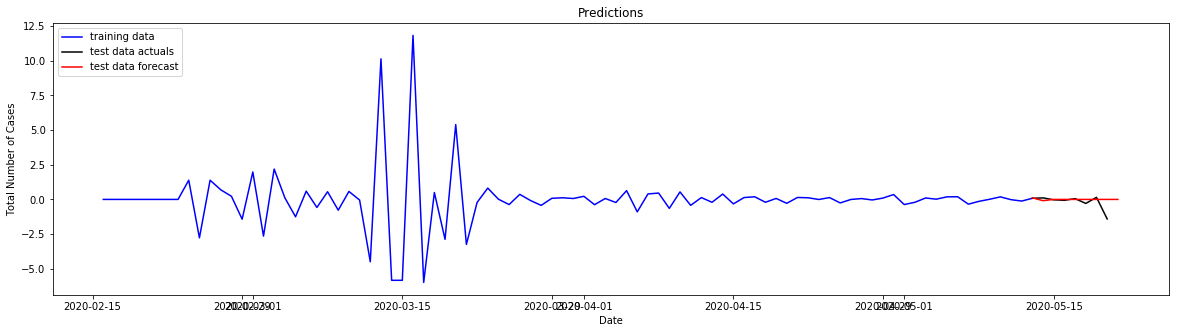

In [105]:
uk_7_1 = pred(ts_uk_log.iloc[:88], (0, 1, 1), 87, 95, ts_uk_log.iloc[87:95])

In [106]:
uk_7_1

Out[294]: 55.07956648147478

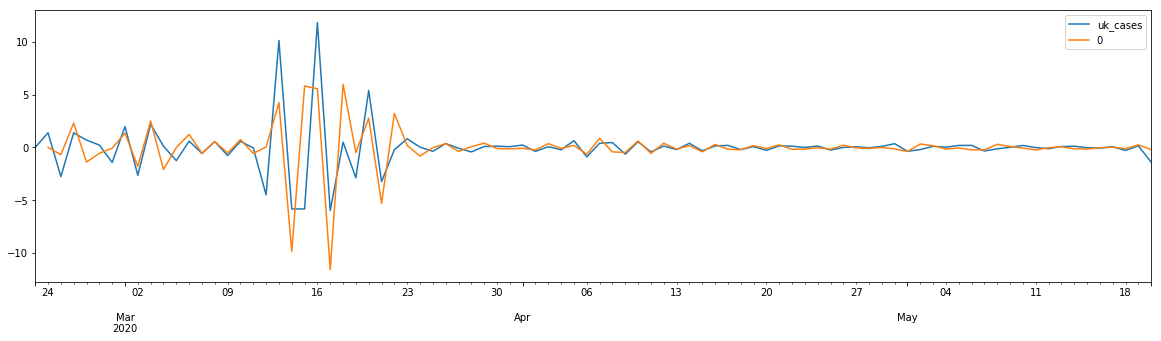

In [107]:
train(ts_uk_log.iloc[7:95], (0, 1, 1), "uk_cases")

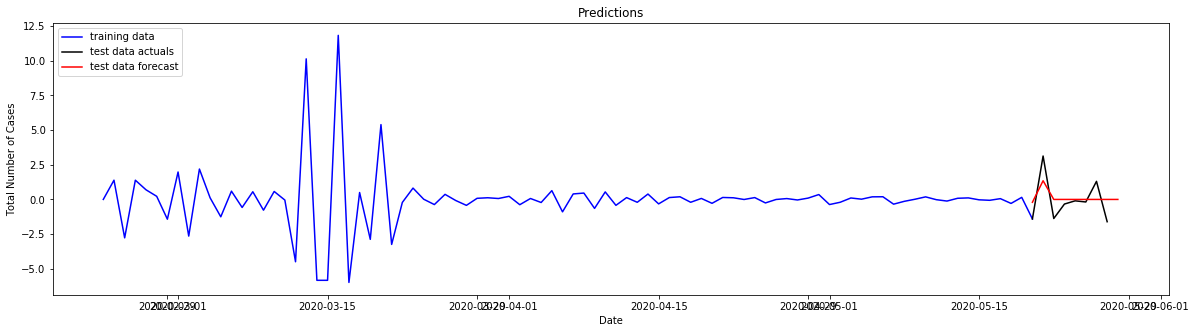

In [108]:
uk_7_2 = pred(ts_uk_log.iloc[7:95], (0, 1, 1), 87, 95, ts_uk_log.iloc[94:102])

In [109]:
uk_7_2

Out[297]: 55.087209788303255

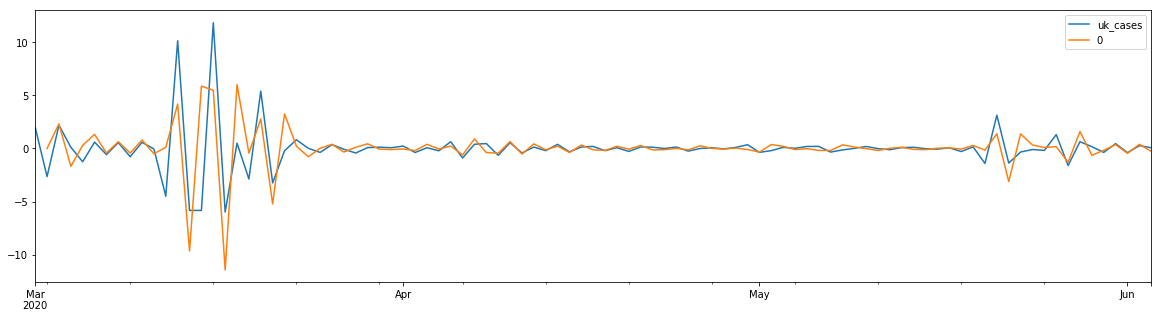

In [110]:
train(ts_uk_log.iloc[14:109], (0, 1, 1), "uk_cases")

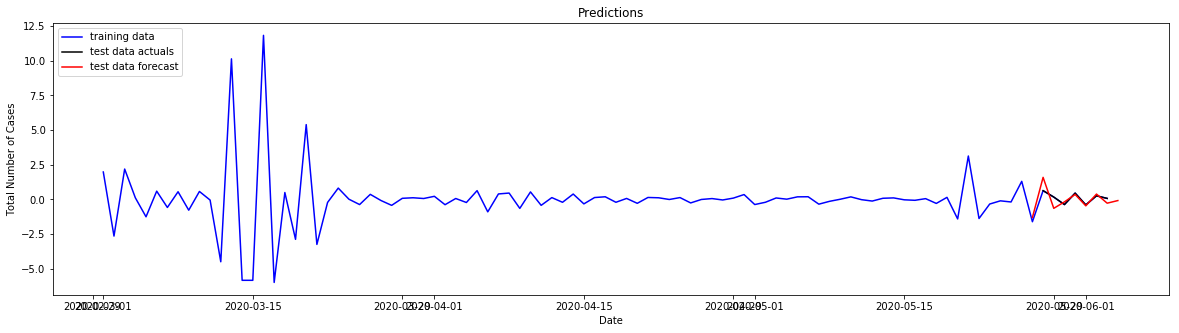

In [111]:
uk_7_3 = pred(ts_uk_log.iloc[14:109], (0, 1, 1), 87, 95, ts_uk_log.iloc[102:109])

In [112]:
uk_7_3

Out[300]: 54.999470653060726

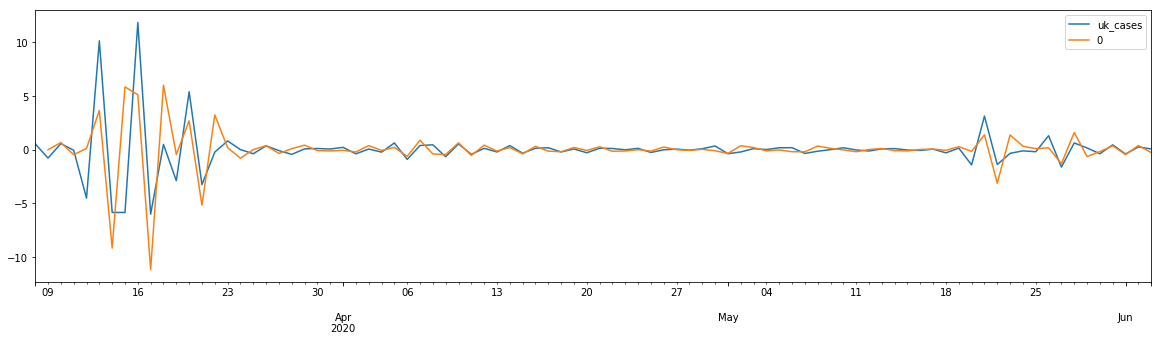

In [113]:
train(ts_uk_log.iloc[21:109], (0, 1, 1), "uk_cases")

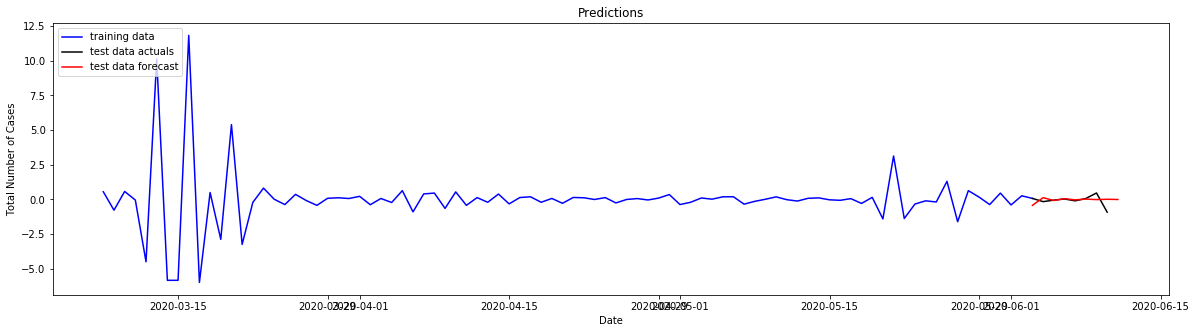

In [114]:
uk_7_4 = pred(ts_uk_log.iloc[21:109], (1, 1, 0), 87, 95, ts_uk_log.iloc[108:116])

In [115]:
uk_7_4

Out[303]: 55.08630025024676

# 1 day (UK)

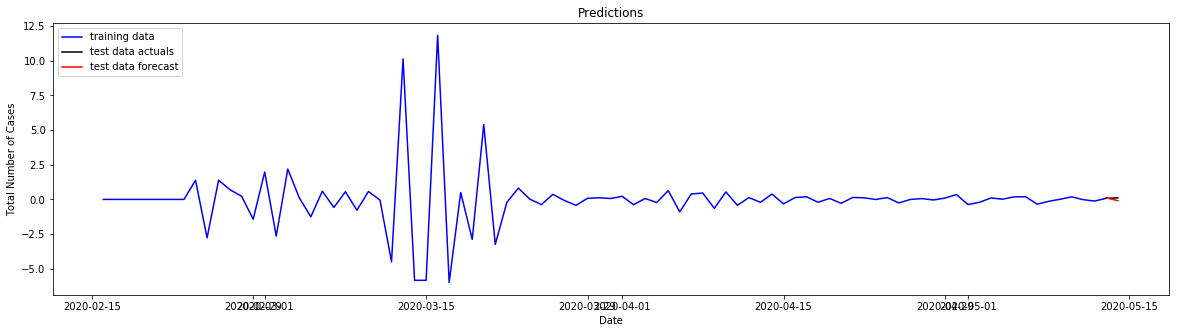

In [117]:
uk_1_1 = pred(ts_uk_log.iloc[0:88], (0, 1, 1), 87, 88, ts_uk_log.iloc[87:89])

In [118]:
uk_1_1

Out[305]: 13.469446196215653

# 30 days (Germany)

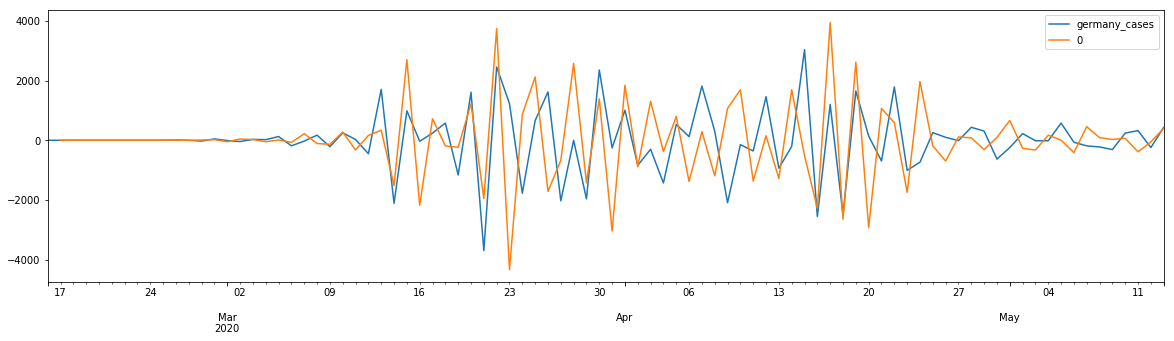

In [120]:
train(ger_diff.iloc[:88], (1, 1, 0), "germany_cases")

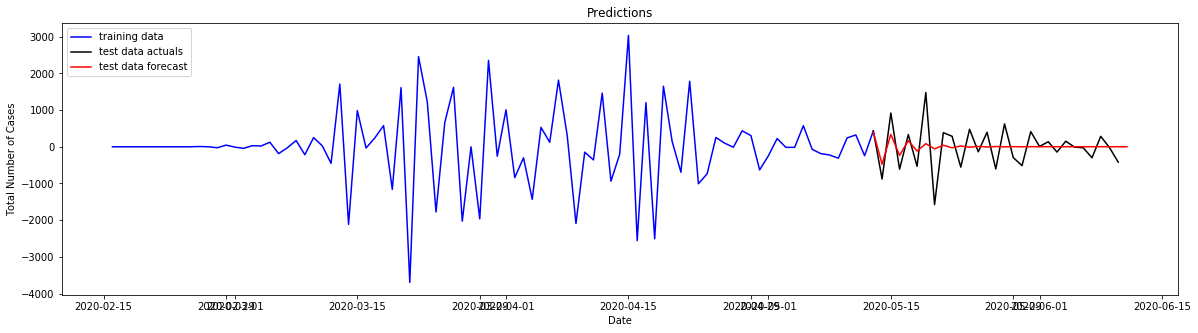

In [121]:
ger_30 = pred(ger_diff.iloc[:88], (1, 1, 0), 87, 116, ger_diff.iloc[87:116])

In [122]:
ger_30

Out[408]: 161.51368943704298

# 14 days (Germany)

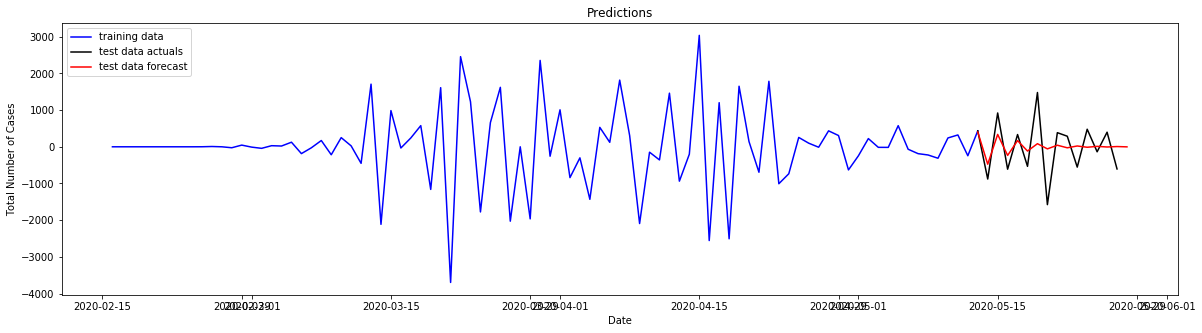

In [124]:
ger_14_1 = pred(ger_diff.iloc[:88], (1, 1, 0), 87, 102, ger_diff.iloc[87:102])

In [125]:
ger_14_1

Out[410]: 199.5473889834418

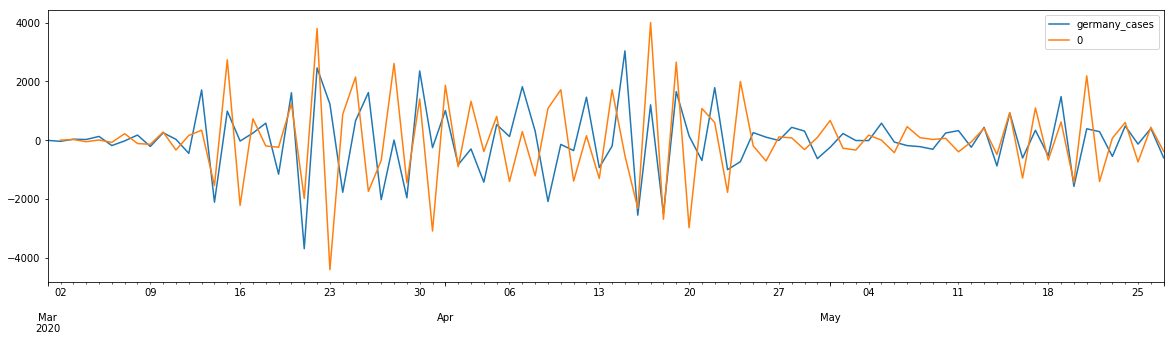

In [126]:
train(ger_diff.iloc[14:102], (1, 1, 0), "germany_cases")

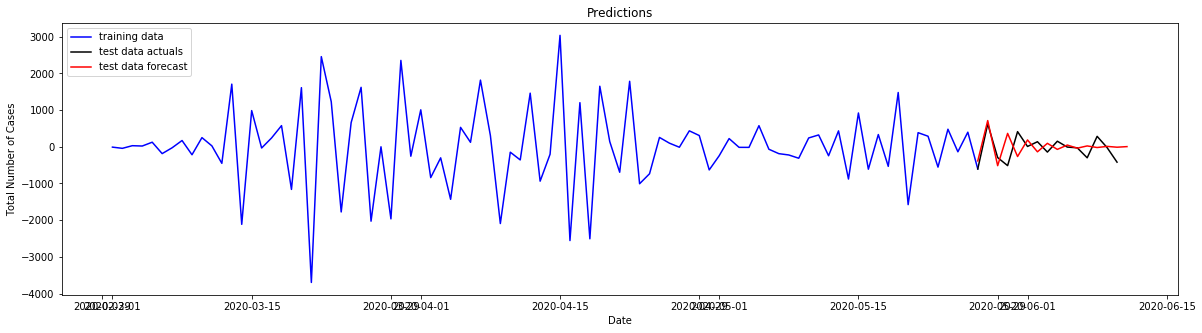

In [127]:
ger_14_2 = pred(ger_diff.iloc[14:102], (1, 1, 0), 87, 102, ger_diff.iloc[101:116])

In [128]:
ger_14_2

Out[413]: 300.6658271076158

# 7 days (Germany)

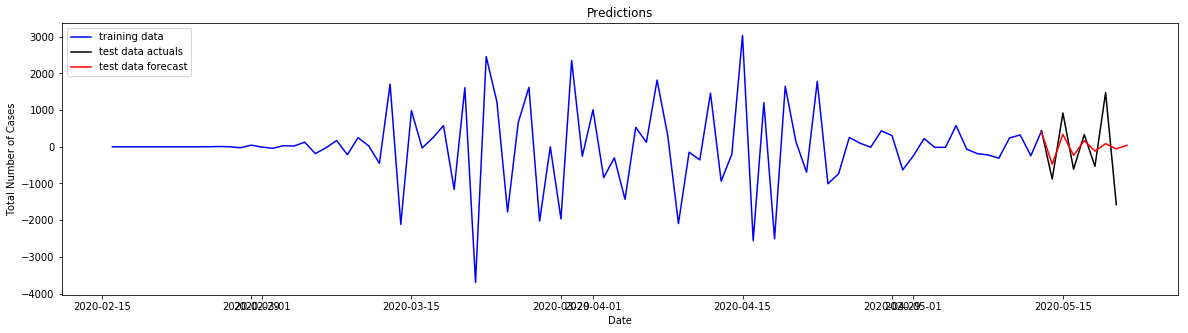

In [130]:
ger_7_1 = pred(ger_diff.iloc[:88], (1, 1, 0), 87, 95, ger_diff.iloc[87:95])

In [131]:
ger_7_1

Out[415]: 246.00986730986355

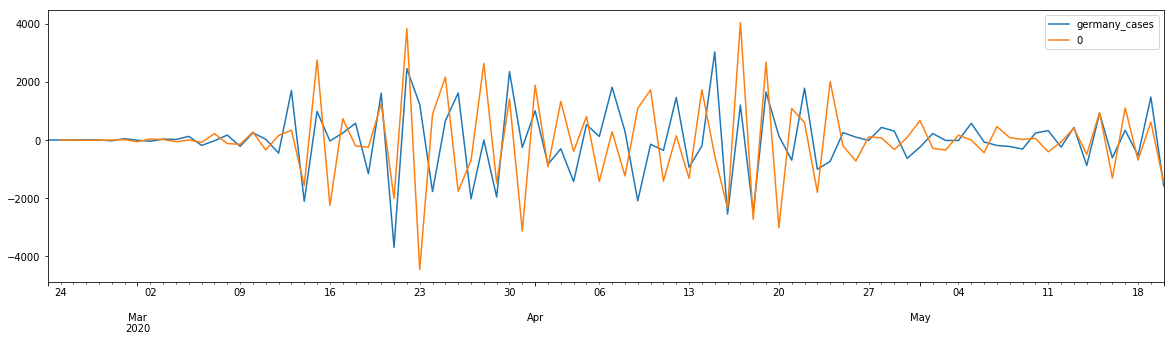

In [132]:
train(ger_diff.iloc[7:95], (1, 1, 0), "germany_cases")

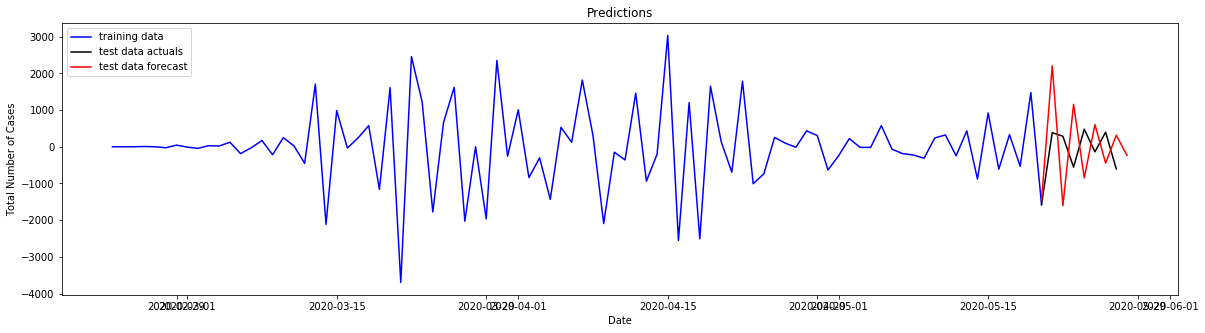

In [133]:
ger_7_2 = pred(ger_diff.iloc[7:95], (1, 1, 0), 87, 95, ger_diff.iloc[94:102])

In [134]:
ger_7_2

Out[419]: 1195.930190474058

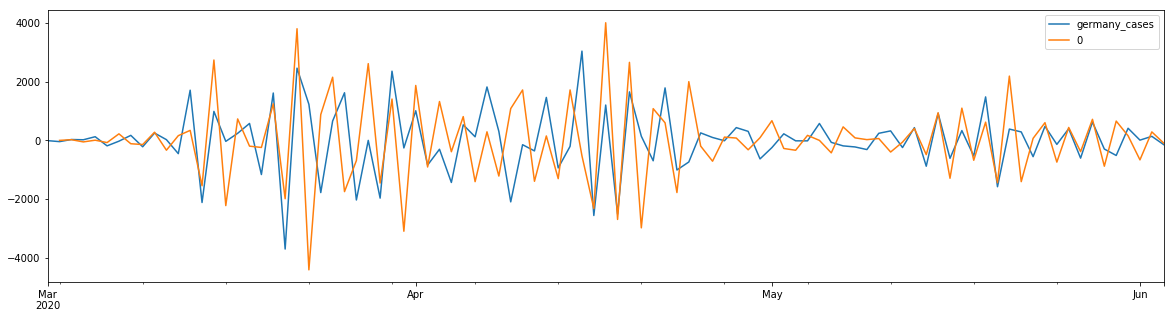

In [135]:
train(ger_diff.iloc[14:109], (1, 1, 0), "germany_cases")

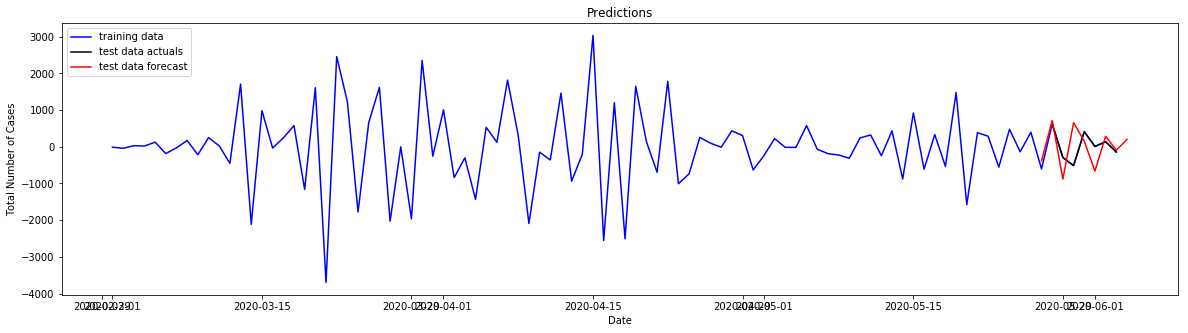

In [136]:
ger_7_3 = pred(ger_diff.iloc[14:109], (1, 1, 0), 87, 95, ger_diff.iloc[102:109])

In [137]:
ger_7_3

Out[423]: 525.6909894015909

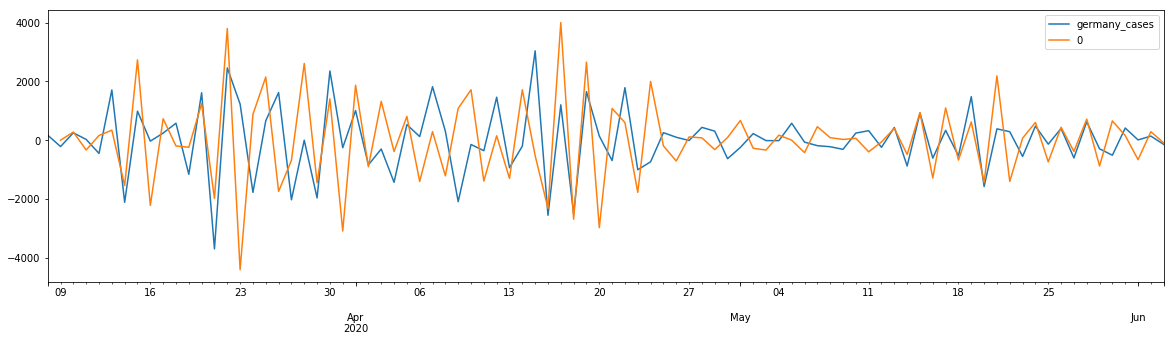

In [138]:
train(ger_diff.iloc[21:109], (1, 1, 0), "germany_cases")

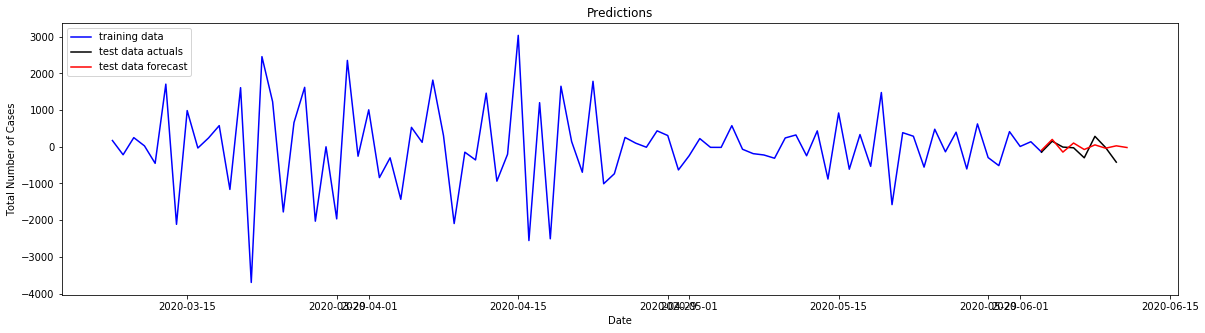

In [139]:
ger_7_4 = pred(ger_diff.iloc[21:109], (1, 1, 0), 87, 95, ger_diff.iloc[108:116])

In [140]:
ger_7_4

Out[426]: 134.3563906165376

# 1 day (Germany)

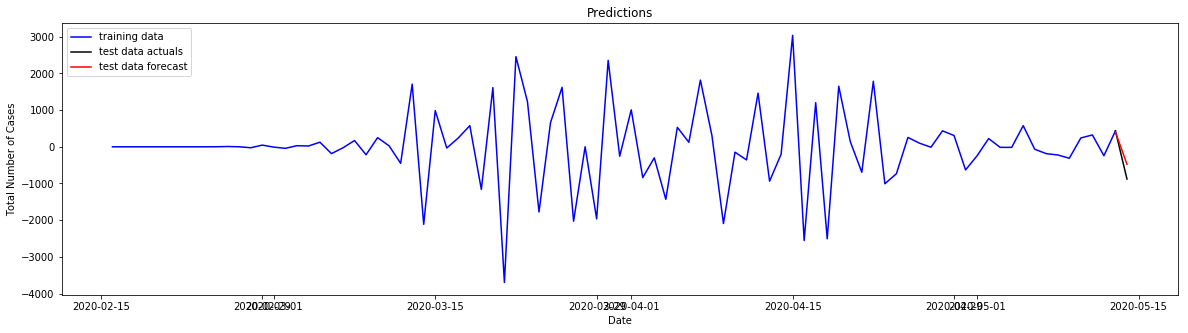

In [142]:
ger_1_1 = pred(ger_diff.iloc[0:88], (1, 1, 0), 87, 88, ger_diff.iloc[87:89])

In [143]:
ger_1_1

Out[429]: 445.4811408531652

# 30 days (France)

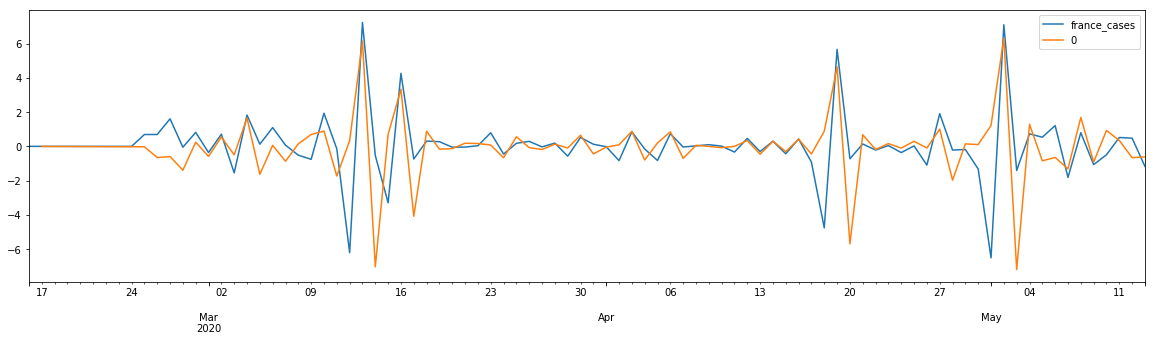

In [145]:
train(ts_fra_log.iloc[:88], (0, 1, 1), "france_cases")

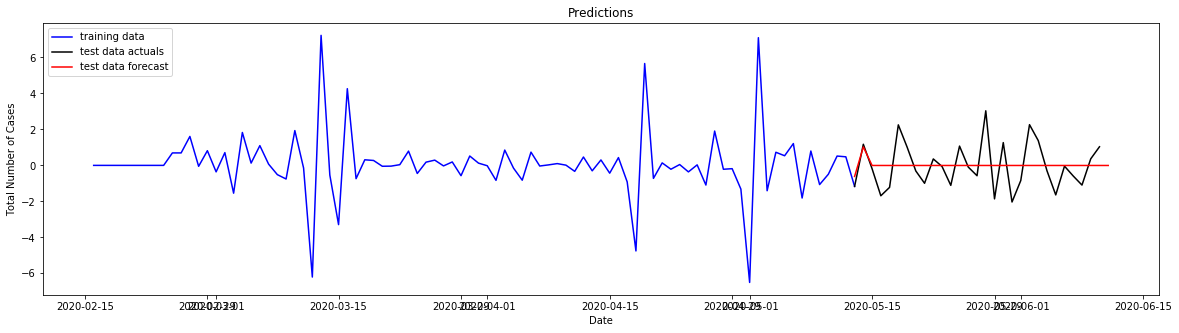

In [146]:
fra_30 = pred(ts_fra_log.iloc[:88], (0, 1, 1), 87, 116, ts_fra_log.iloc[87:116])

In [147]:
fra_30

Out[311]: 91.77055497547643

# 14 days (France)

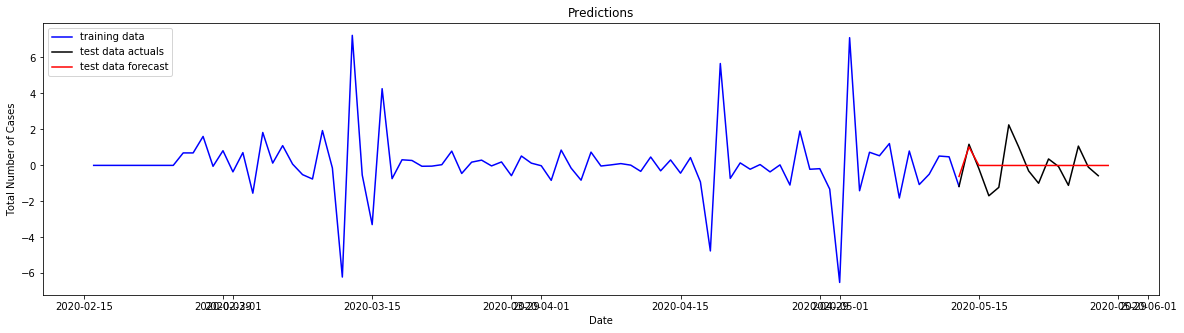

In [149]:
fra_14_1 = pred(ts_fra_log.iloc[:88], (0, 1, 1), 87, 102, ts_fra_log.iloc[87:102])

In [150]:
fra_14_1

Out[313]: 82.2622109720521

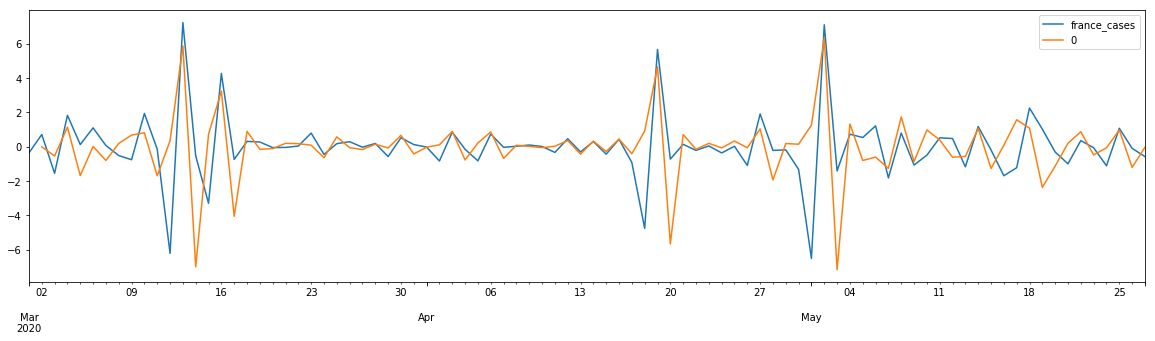

In [151]:
train(ts_fra_log.iloc[14:102], (0, 1, 1), "france_cases")

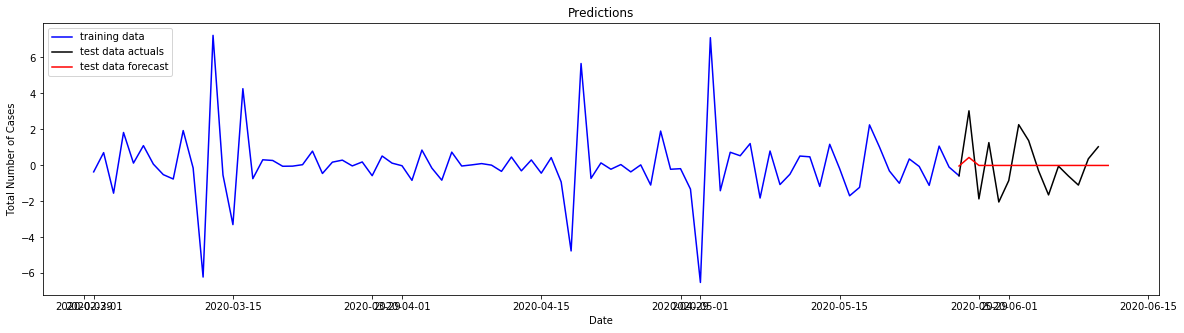

In [152]:
fra_14_2 = pred(ts_fra_log.iloc[14:102], (0, 1, 1), 87, 102, ts_fra_log.iloc[101:116])

In [153]:
fra_14_2

Out[316]: 82.26728589243893

# 7 days (France)

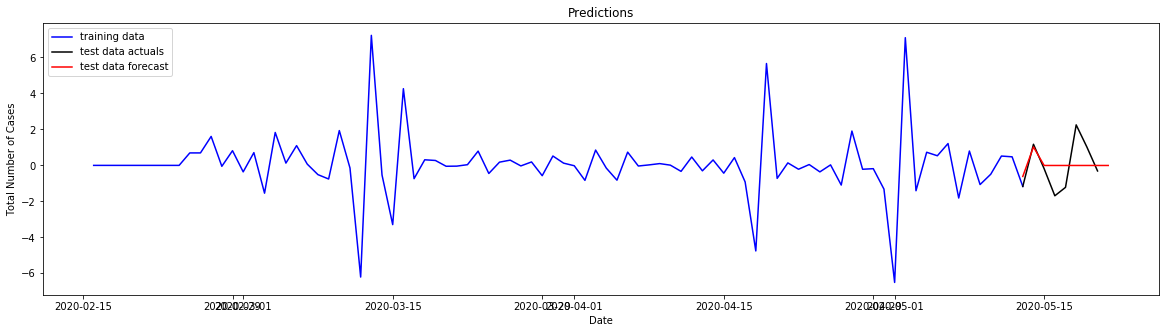

In [155]:
fra_7_1 = pred(ts_fra_log.iloc[:88], (0, 1, 1), 87, 95, ts_fra_log.iloc[87:95])

In [156]:
fra_7_1

Out[318]: 55.067562109123806

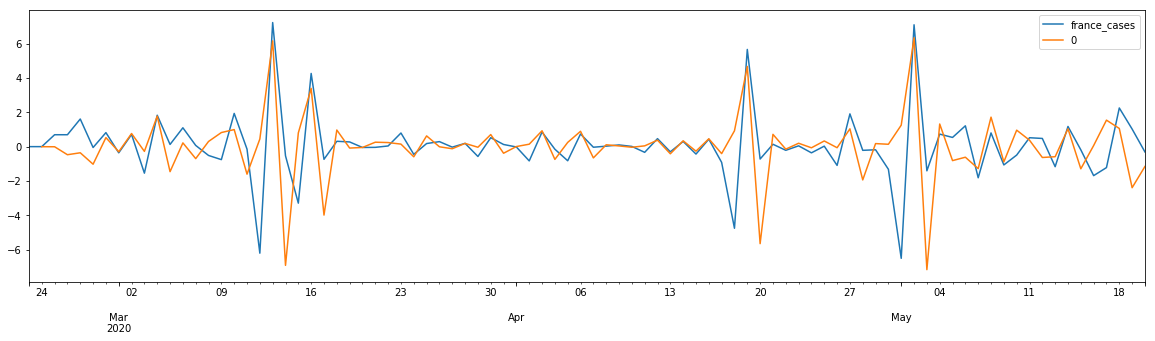

In [157]:
train(ts_fra_log.iloc[7:95], (0, 1, 1), "france_cases")

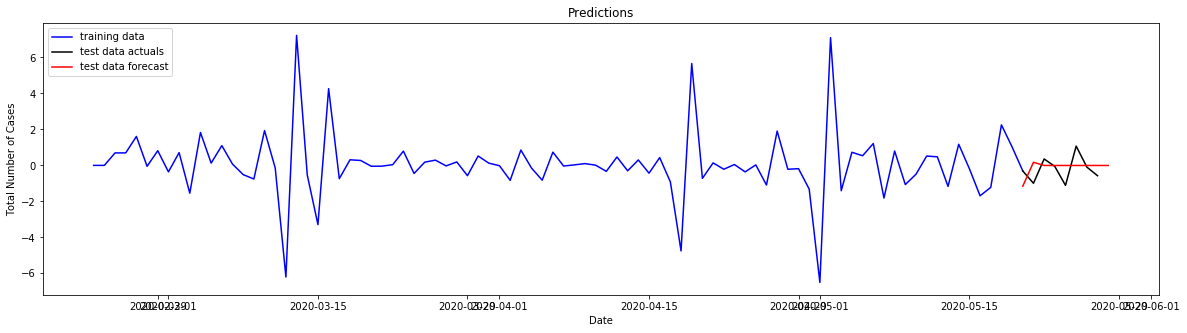

In [158]:
fra_7_2 = pred(ts_fra_log.iloc[7:95], (0, 1, 1), 87, 95, ts_fra_log.iloc[94:102])

In [159]:
fra_7_2

Out[321]: 55.03756065042516

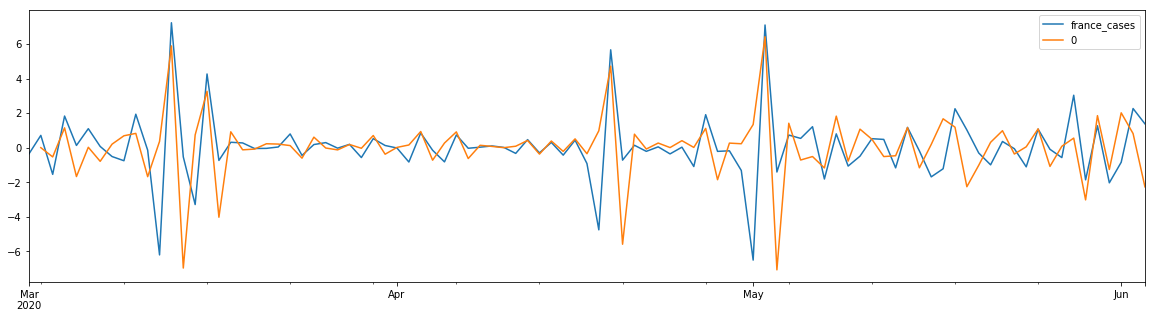

In [160]:
train(ts_fra_log.iloc[14:109], (0, 1, 1), "france_cases")

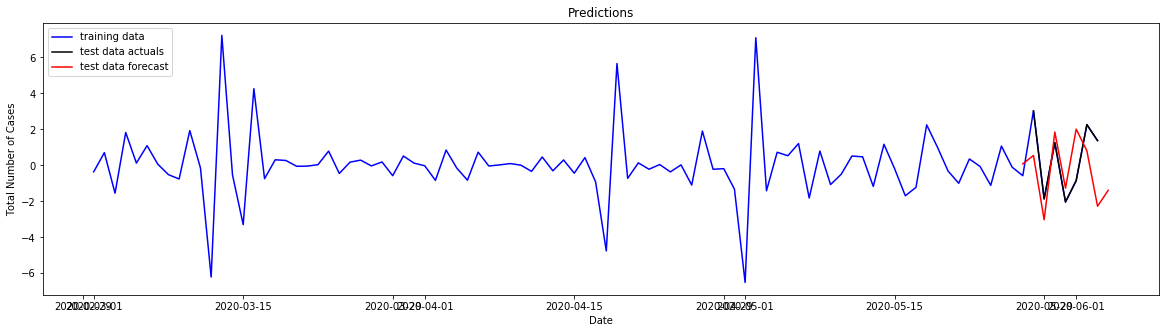

In [161]:
fra_7_3 = pred(ts_fra_log.iloc[14:109], (0, 1, 1), 87, 95, ts_fra_log.iloc[102:109])

In [162]:
fra_7_3

Out[324]: 56.377713774615

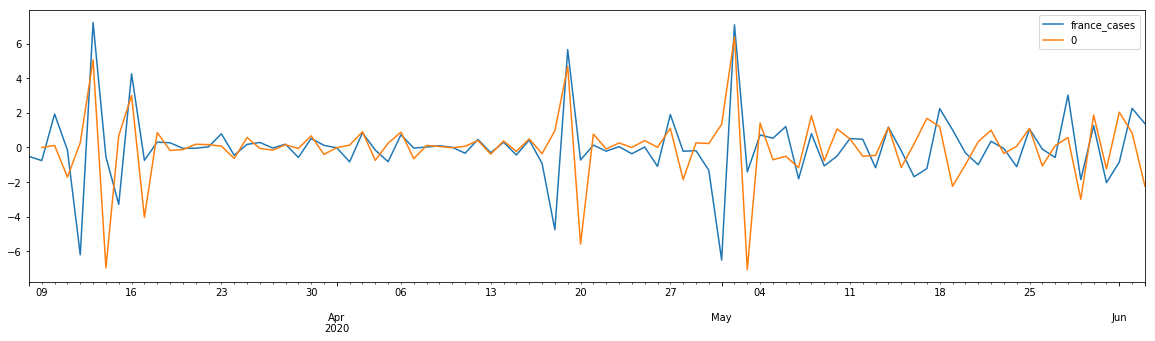

In [163]:
train(ts_fra_log.iloc[21:109], (0, 1, 1), "france_cases")

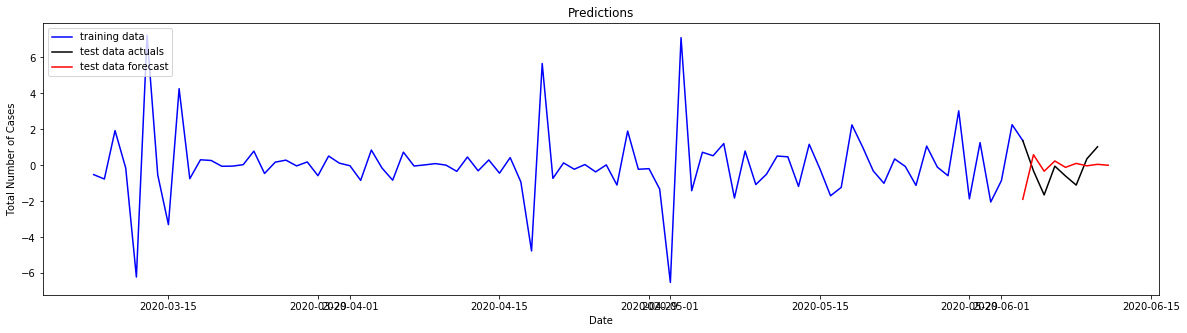

In [164]:
fra_7_4 = pred(ts_fra_log.iloc[21:109], (1, 1, 0), 87, 95, ts_fra_log.iloc[108:116])

In [165]:
fra_7_4

Out[328]: 55.118125379119036

# 1 day (France)

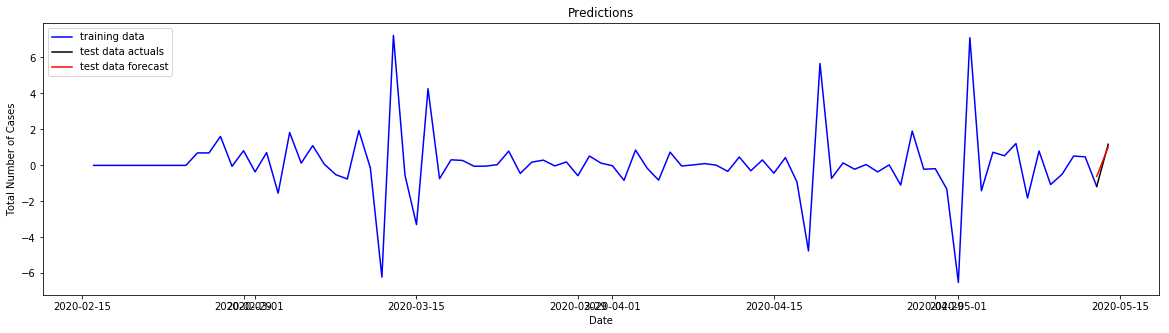

In [167]:
fra_1_1 = pred(ts_fra_log.iloc[0:88], (0, 1, 1), 87, 88, ts_fra_log.iloc[87:89])

In [168]:
fra_1_1

Out[330]: 13.258607020838003